# Gráfico

In [1083]:
library("fredr")
library("tidyverse")
library("scales")
library("vroom")
library("ggplot2")
library("dplyr")
library("scales")
library("zoo")
library("gapminder")
library("gganimate")
library("utf8")
library("gridExtra")
library("socviz")
library("ggrepel")
Sys.setlocale("LC_ALL", "pt_br.utf-8")
library("lubridate")
library("readr")
library("ggthemes")
library("maps")
library("ggpomological")
library("ggthemr")
library("extrafont")


[1] "pt_br.utf-8/pt_br.utf-8/pt_br.utf-8/C/pt_br.utf-8/C"

theme_solarized() <br>
theme_pomological() <br>
scale_colour_solarized() <br>
theme_wsj()

In [1084]:
# obs:
# mudança na escala feita da seguinte maneira:
options(repr.plot.width=15, repr.plot.height=8)

In [1085]:
# font_import()

In [1086]:
runners_data = read.csv("Runners.csv")
glimpse(runners_data)

Rows: 18,244
Columns: 10
$ Rank          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 15, 16, 17,…
$ Time          <chr> "00:01:40.910000", "00:01:41.010000", "00:01:41.090000",…
$ Name          <chr> "David Rudisha", "David Rudisha", "David Rudisha", "Wils…
$ Country       <chr> "KEN", "KEN", "KEN", "DEN", "DEN", "KEN", "KEN", "KEN", …
$ Date.of.Birth <chr> "1988-12-17", "1988-12-17", "1988-12-17", "1970-12-12", …
$ Place         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,…
$ City          <chr> "London", "Rieti", "Berlin", "Köln", "Zürich", "Rieti", …
$ Date          <chr> "2012-09-08", "2010-08-29", "2010-08-22", "1997-08-24", …
$ Gender        <chr> "Men", "Men", "Men", "Men", "Men", "Men", "Men", "Men", …
$ Event         <chr> "800 m", "800 m", "800 m", "800 m", "800 m", "800 m", "8…


In [1087]:
runners_data$Date <- as.POSIXct(runners_data$Date, format = "%Y-%m-%d")
head(runners_data)

Rank Time            Name            Country Date.of.Birth Place City  
1 1    00:01:40.910000 David Rudisha   KEN     1988-12-17    1     London
2 2    00:01:41.010000 David Rudisha   KEN     1988-12-17    1     Rieti 
3 3    00:01:41.090000 David Rudisha   KEN     1988-12-17    1     Berlin
4 4    00:01:41.110000 Wilson Kipketer DEN     1970-12-12    1     Köln  
5 5    00:01:41.240000 Wilson Kipketer DEN     1970-12-12    1     Zürich
6 6    00:01:41.330000 David Rudisha   KEN     1988-12-17    1     Rieti 
  Date       Gender Event
1 2012-09-08 Men    800 m
2 2010-08-29 Men    800 m
3 2010-08-22 Men    800 m
4 1997-08-24 Men    800 m
5 1997-08-13 Men    800 m
6 2011-10-09 Men    800 m

In [1088]:
runners_data <- runners_data |>
mutate(
    Age = year(runners_data$Date) - year(runners_data$Date.of.Birth	)
)
glimpse(runners_data)

Rows: 18,244
Columns: 11
$ Rank          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 15, 16, 17,…
$ Time          <chr> "00:01:40.910000", "00:01:41.010000", "00:01:41.090000",…
$ Name          <chr> "David Rudisha", "David Rudisha", "David Rudisha", "Wils…
$ Country       <chr> "KEN", "KEN", "KEN", "DEN", "DEN", "KEN", "KEN", "KEN", …
$ Date.of.Birth <chr> "1988-12-17", "1988-12-17", "1988-12-17", "1970-12-12", …
$ Place         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,…
$ City          <chr> "London", "Rieti", "Berlin", "Köln", "Zürich", "Rieti", …
$ Date          <dttm> 2012-09-08, 2010-08-29, 2010-08-22, 1997-08-24, 1997-08…
$ Gender        <chr> "Men", "Men", "Men", "Men", "Men", "Men", "Men", "Men", …
$ Event         <chr> "800 m", "800 m", "800 m", "800 m", "800 m", "800 m", "8…
$ Age           <dbl> 24, 22, 22, 27, 27, 23, 22, 24, 25, 27, 18, 24, 21, 26, …


In [1089]:
color_per_gender <- c("Men" = "#2986cc", "Women" = "#d5a6bd")
color_per_medal <- c("Gold_medals" = "#D6AF36", "Silver_medals"= "#A7A7AD", "Bronze_medals" = "#A77044")

# Performance entre sexo

Vamos começar analisando a performace entre homens e mulhes

In [1090]:
runners_women <- runners_data |>
filter(Gender == "Women")

runners_men <- runners_data |>
filter(Gender == "Men")

runners_men$Year <- year(runners_men$Date)
runners_women$Year <- year(runners_women$Date)
runners_data$Year <- year(runners_data$Date)

In [1091]:
glimpse(runners_data)

Rows: 18,244
Columns: 12
$ Rank          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 15, 16, 17,…
$ Time          <chr> "00:01:40.910000", "00:01:41.010000", "00:01:41.090000",…
$ Name          <chr> "David Rudisha", "David Rudisha", "David Rudisha", "Wils…
$ Country       <chr> "KEN", "KEN", "KEN", "DEN", "DEN", "KEN", "KEN", "KEN", …
$ Date.of.Birth <chr> "1988-12-17", "1988-12-17", "1988-12-17", "1970-12-12", …
$ Place         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,…
$ City          <chr> "London", "Rieti", "Berlin", "Köln", "Zürich", "Rieti", …
$ Date          <dttm> 2012-09-08, 2010-08-29, 2010-08-22, 1997-08-24, 1997-08…
$ Gender        <chr> "Men", "Men", "Men", "Men", "Men", "Men", "Men", "Men", …
$ Event         <chr> "800 m", "800 m", "800 m", "800 m", "800 m", "800 m", "8…
$ Age           <dbl> 24, 22, 22, 27, 27, 23, 22, 24, 25, 27, 18, 24, 21, 26, …
$ Year          <dbl> 2012, 2010, 2010, 1997, 1997, 2011, 2010, 2012, 1981, 19…


In [1092]:
performance_runners_men <- runners_men |>
group_by(Year) |>
filter(Year <= 2016) |>
summarise(
    Gold_medals = sum(Place == 1,na.rm = TRUE),
    Silver_medals = sum(Place == 2,na.rm = TRUE),
    Bronze_medals = sum(Place == 3,na.rm = TRUE),
    Total = Gold_medals + Silver_medals + Bronze_medals
)
glimpse(performance_runners_men)

Rows: 52
Columns: 5
$ Year          <dbl> 1962, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1973, 19…
$ Gold_medals   <int> 1, 1, 1, 2, 7, 1, 2, 5, 3, 10, 7, 7, 16, 14, 14, 15, 18,…
$ Silver_medals <int> 0, 0, 0, 0, 4, 0, 0, 2, 0, 1, 0, 3, 4, 2, 0, 3, 1, 8, 7,…
$ Bronze_medals <int> 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 4,…
$ Total         <int> 1, 1, 1, 2, 14, 1, 2, 7, 3, 12, 7, 11, 21, 17, 14, 19, 1…


In [1093]:
performance_runners_women <- runners_women |>
group_by(Year) |>
filter(Year <= 2016) |>
summarise(
    Gold_medals = sum(Place == 1,na.rm = TRUE),
    Silver_medals = sum(Place == 2,na.rm = TRUE),
    Bronze_medals = sum(Place == 3,na.rm = TRUE),
    Total = Gold_medals + Silver_medals + Bronze_medals
)
glimpse(performance_runners_women)

Rows: 45
Columns: 5
$ Year          <dbl> 1964, 1972, 1973, 1974, 1976, 1977, 1978, 1979, 1980, 19…
$ Gold_medals   <int> 1, 2, 3, 8, 28, 12, 22, 47, 59, 49, 59, 62, 119, 78, 90,…
$ Silver_medals <int> 0, 1, 0, 0, 13, 2, 8, 13, 27, 15, 18, 26, 54, 33, 30, 30…
$ Bronze_medals <int> 0, 0, 0, 0, 7, 0, 5, 7, 16, 8, 9, 12, 25, 11, 8, 14, 26,…
$ Total         <int> 1, 3, 3, 8, 48, 14, 35, 67, 102, 72, 86, 100, 198, 122, …


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


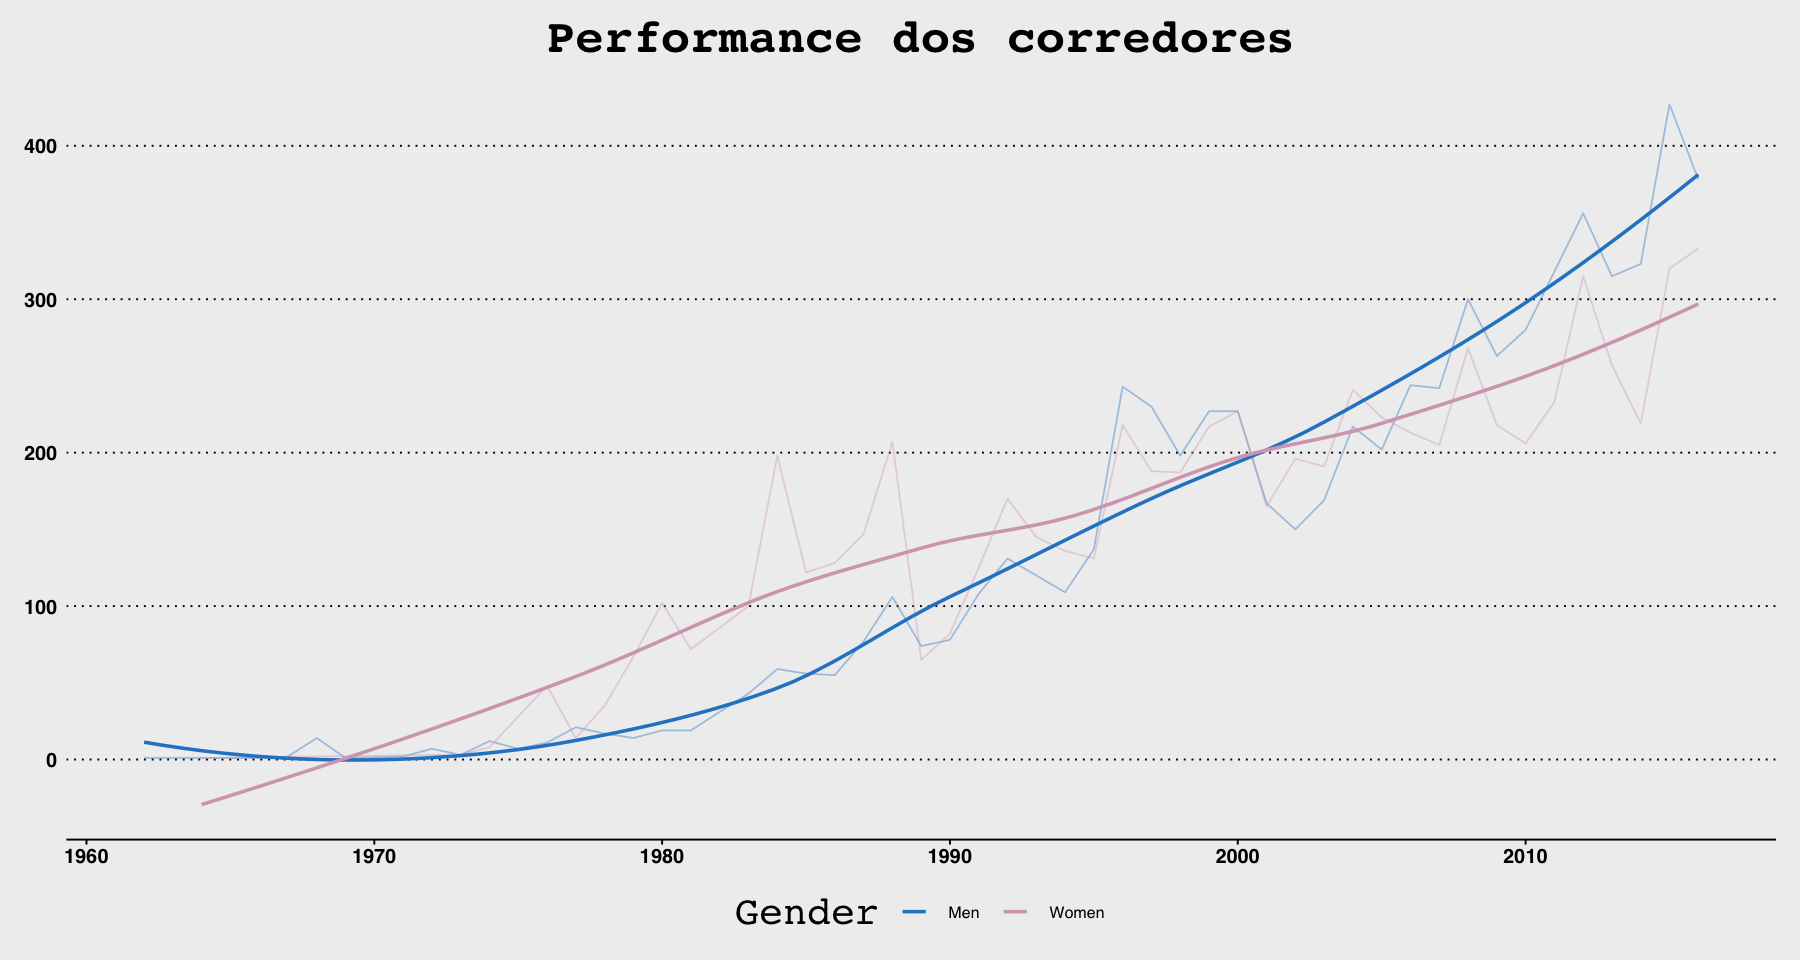

In [1094]:
performance_runners_men$Gender <- "Men"
performance_runners_women$Gender <- "Women"
combined_data_performance_runners <- rbind(performance_runners_men, performance_runners_women)
ggplot(data = combined_data_performance_runners, aes(x = Year, y = Total, color = Gender)) + geom_line(alpha = 0.4) + scale_x_continuous(breaks = seq(1960, 2015, 10)) +
geom_smooth(se = FALSE) + theme_wsj(color = "gray") + scale_color_manual(values = color_per_gender)  +
labs(
    title = "Performance dos corredores",
    y ="defdefe"
) + theme(
    plot.title = element_text(hjust = 0.5),
    ## change font
    legend.position = "bottom"
)

In [1095]:
gold_medal_plot <- ggplot(data = combined_data_performance_runners, mapping = aes(y = Gold_medals, x  = Year,color = Gender)) + geom_line() + theme_wsj(color = "gray") +
scale_color_manual(values = color_per_gender) + labs(
    title  = "Medalhas entre homens e mulheres",
     y = "medalhas de ouro"
)  + theme(
    plot.title = element_text(hjust = 0.5),
) + guides(color = FALSE)

In [1096]:
silver_medal_plot <- ggplot(data = combined_data_performance_runners, mapping = aes(y = Silver_medals, x  = Year,color = Gender)) + geom_line() + theme_wsj(color = "gray") + guides(color = FALSE)+ 
scale_color_manual(values = color_per_gender) + labs(
    y = "medalhas de prata"
)


In [1097]:
bronze_medal_plot <- ggplot(data = combined_data_performance_runners, mapping = aes(y = Silver_medals, x  = Year,color = Gender)) + geom_line() + theme_wsj(color = "gray") + 
scale_color_manual(values = color_per_gender) + labs(
    y = "medalhas de bronze"
) + theme(
    legend.position = "bottom"
)

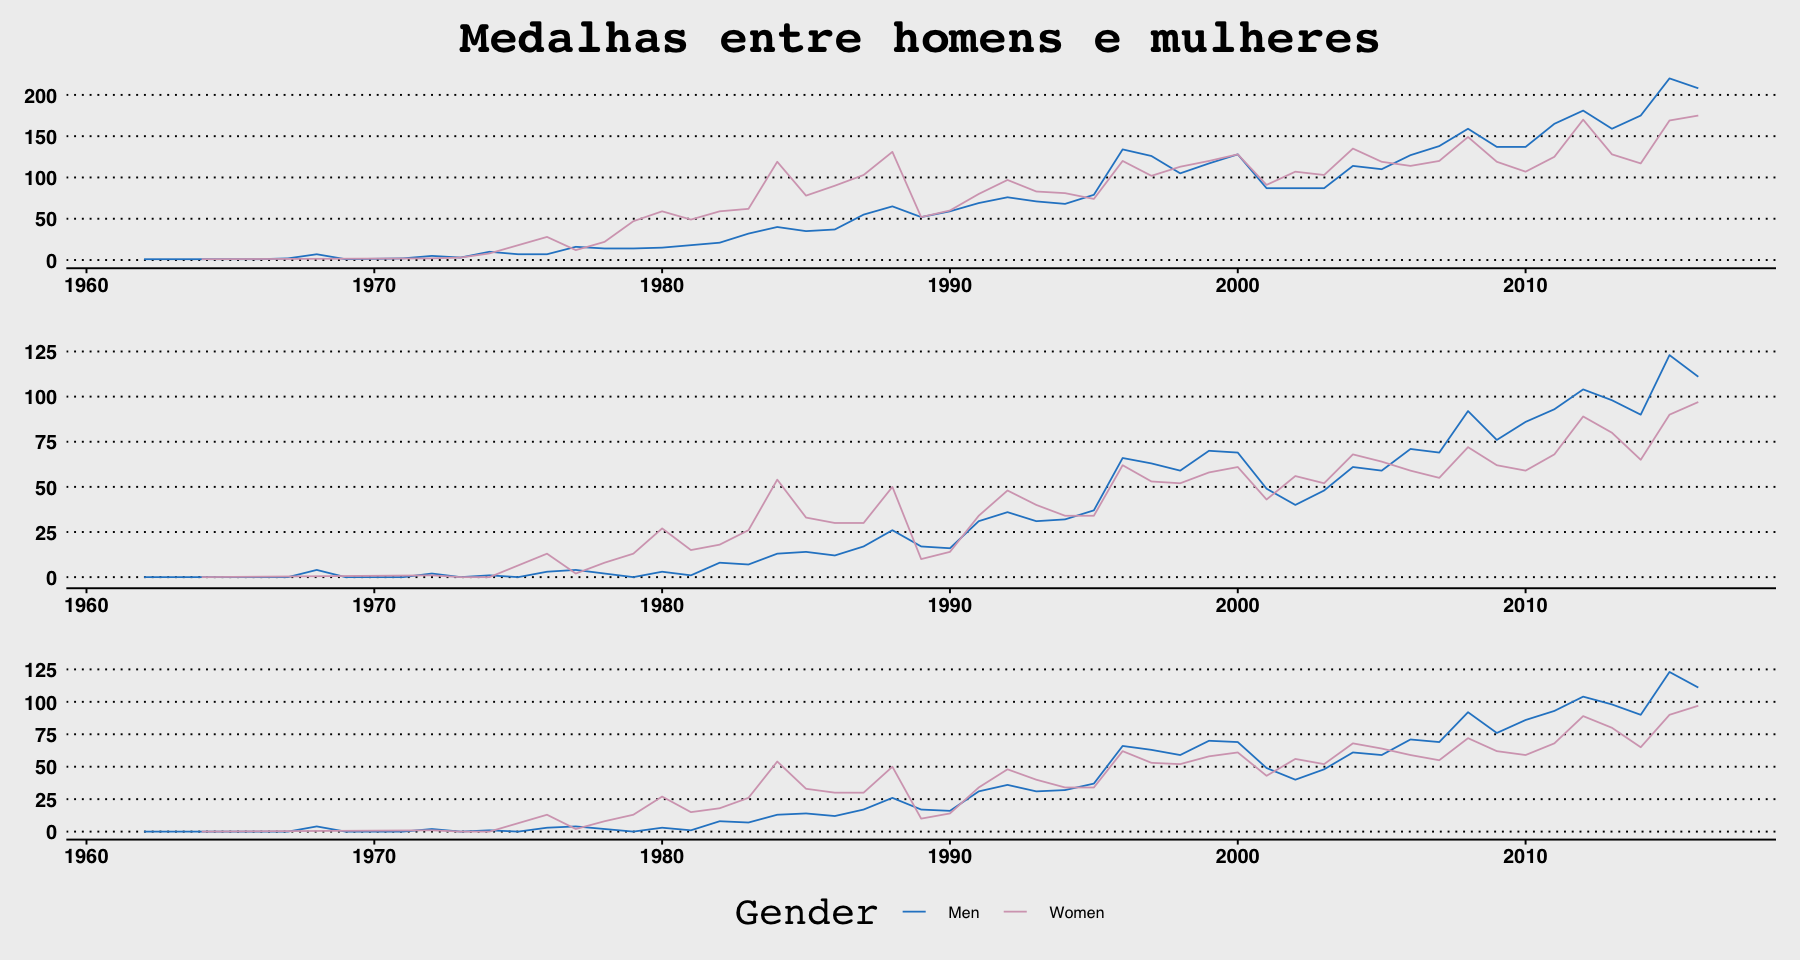

In [1098]:
grid.arrange(gold_medal_plot,silver_medal_plot,bronze_medal_plot)

In [1099]:
head(combined_data_performance_runners)

Year Gold_medals Silver_medals Bronze_medals Total Gender
1 1962 1           0             0              1    Men   
2 1965 1           0             0              1    Men   
3 1966 1           0             0              1    Men   
4 1967 2           0             0              2    Men   
5 1968 7           4             3             14    Men   
6 1969 1           0             0              1    Men

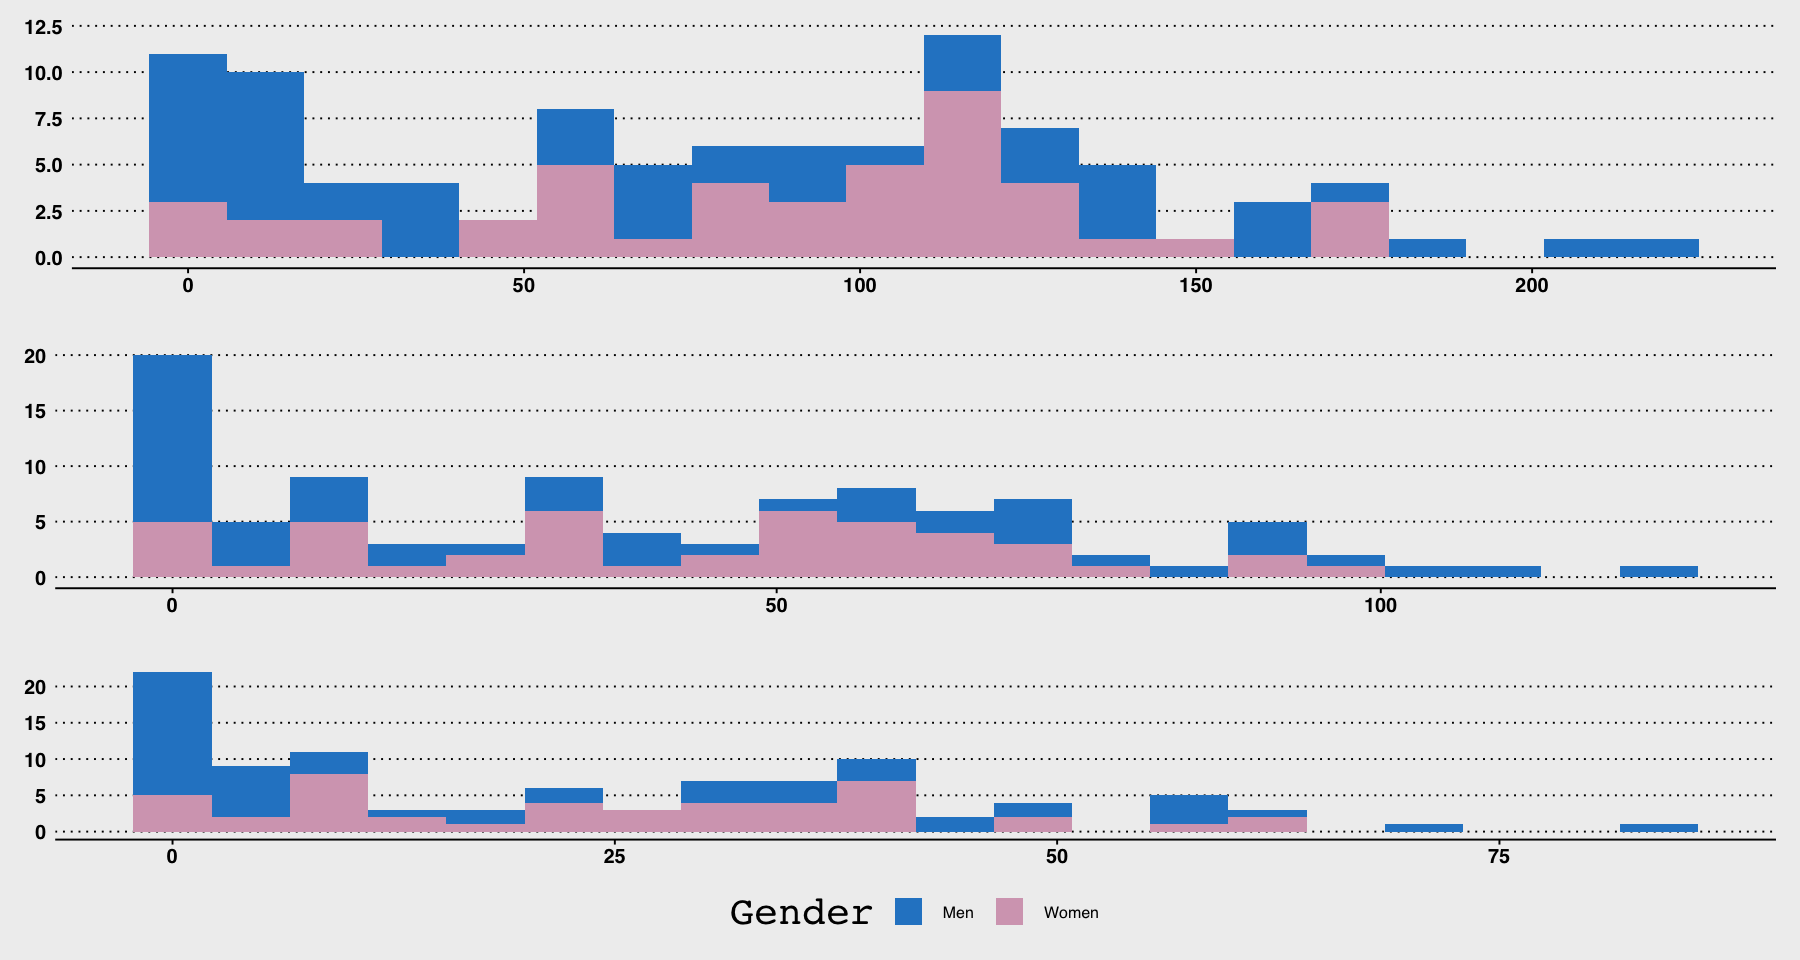

In [1100]:
gold_medal_plot  <- ggplot(data = combined_data_performance_runners,mapping = aes(x = Gold_medals, fill = Gender)) + geom_histogram(bins = 20) + theme_wsj(color = "gray") + scale_color_manual(values = color_per_gender) + scale_fill_manual(values = color_per_gender)+ guides(fill = FALSE)
silver_medal_plot <- ggplot(data = combined_data_performance_runners,mapping = aes(x = Silver_medals, fill = Gender)) + geom_histogram(bins = 20) + theme_wsj(color = "gray") + guides(fill = FALSE) + scale_fill_manual(values = color_per_gender)
bronze_medal_plot <- ggplot(data = combined_data_performance_runners,mapping = aes(x = Bronze_medals, fill = Gender)) + geom_histogram(bins = 20) + theme_wsj(color = "gray")  + scale_fill_manual(values = color_per_gender) + theme(legend.position = "bottom")
grid.arrange(gold_medal_plot,silver_medal_plot,bronze_medal_plot)

## Performance por país 

In [1101]:
performance_country <- runners_data |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Country,sort = TRUE)

performance_country_filtered <- head(performance_country$Country,9)
performance_country_filtered <- as.list(performance_country_filtered)

In [1102]:
countries_performance_per_year <- runners_data |>
group_by(Country,Year) |>
filter(Place == 1 | Place == 2 | Place == 3, Year <= 2016) |>
count(Country,sort =  TRUE) |>
rename(total = n)  

top_countries_performance_per_year <- countries_performance_per_year |> filter(Country %in% performance_country_filtered)

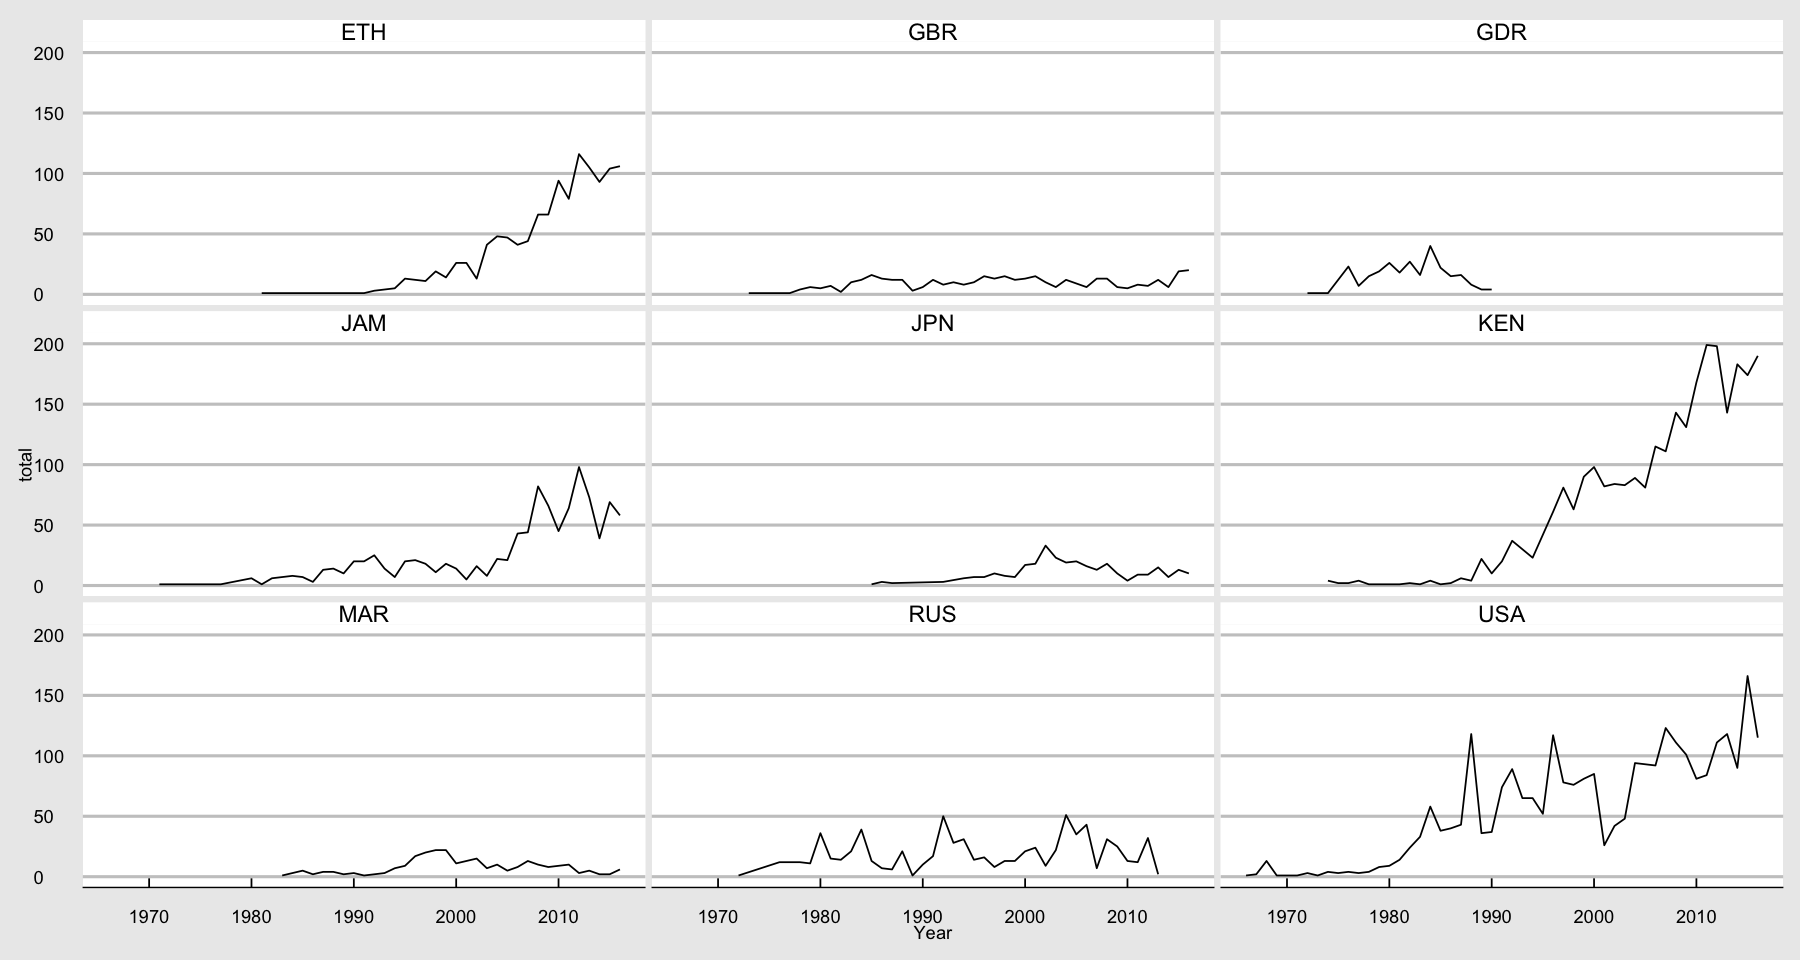

In [1103]:
ggplot(data = top_countries_performance_per_year, mapping = aes(x = Year, y = total)) + geom_line(mapping = aes(group = Country)) + 
facet_wrap(~Country, ncol = 3)  + theme_economist_white() 

In [1104]:
performance_country_by_sex <- runners_data |>
group_by(Country,Gender,Year) |>
filter(Place == 1 | Place == 2 | Place == 3, Year <= 2016) |>
count(Gender,sort =  TRUE) |>
rename(total = n) 
top_performance_country_by_sex <- performance_country_by_sex |> filter(Country %in% performance_country_filtered)

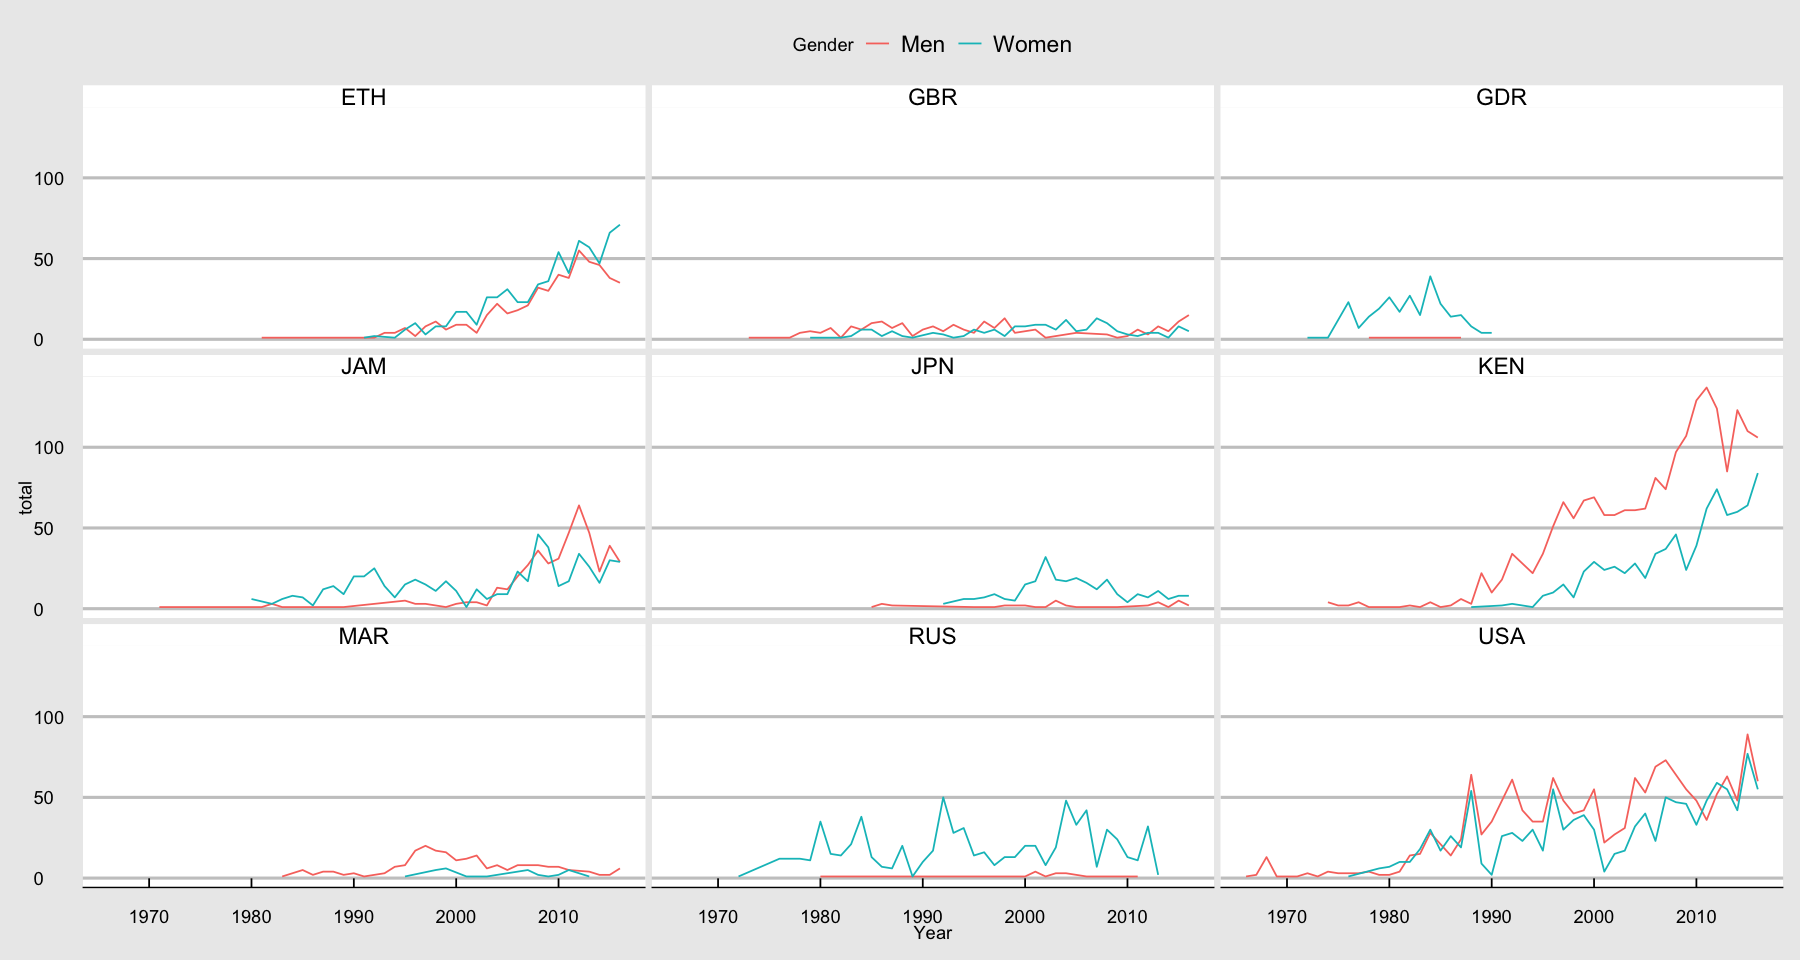

In [1105]:
ggplot(data = top_performance_country_by_sex, mapping = aes(x = Year, y = total,color = Gender)) + geom_line() + 
facet_wrap(~Country, ncol = 3) + theme_economist_white()


In [1106]:
performance_runners_men <- runners_men |>
group_by(Country) |>
filter(Year <= 2016) |>
summarise(
    Gold_medals = sum(Place == 1,na.rm = TRUE),
    Silver_medals = sum(Place == 2,na.rm = TRUE),
    Bronze_medals = sum(Place == 3,na.rm = TRUE),
    Total = Gold_medals + Silver_medals + Bronze_medals
)

In [1107]:
performance_runners_men <- performance_runners_men |>
pivot_longer(
  cols = c(Gold_medals, Silver_medals, Bronze_medals),
  names_to = "Medal",
  values_to = "Count"
)
performance_runners_men <-as.data.frame(performance_runners_men)
performance_runners_men <- performance_runners_men |> filter(Country %in% performance_country_filtered)

In [1108]:
performance_runners_men

Country Total Medal         Count
1  ETH      524  Gold_medals    265 
2  ETH      524  Silver_medals  149 
3  ETH      524  Bronze_medals  110 
4  GBR      220  Gold_medals    143 
5  GBR      220  Silver_medals   55 
6  GBR      220  Bronze_medals   22 
7  GDR        6  Gold_medals      5 
8  GDR        6  Silver_medals    1 
9  GDR        6  Bronze_medals    0 
10 JAM      453  Gold_medals    291 
11 JAM      453  Silver_medals  116 
12 JAM      453  Bronze_medals   46 
13 JPN       40  Gold_medals     16 
14 JPN       40  Silver_medals   11 
15 JPN       40  Bronze_medals   13 
16 KEN     1985  Gold_medals    894 
17 KEN     1985  Silver_medals  659 
18 KEN     1985  Bronze_medals  432 
19 MAR      226  Gold_medals    130 
20 MAR      226  Silver_medals   52 
21 MAR      226  Bronze_medals   44 
22 RUS       21  Gold_medals     12 
23 RUS       21  Silver_medals    8 
24 RUS       21  Bronze_medals    1 
25 USA     1609  Gold_medals   1047 
26 USA     1609  Silver_medals  384 
27 USA     1609  Bronze_medals  178

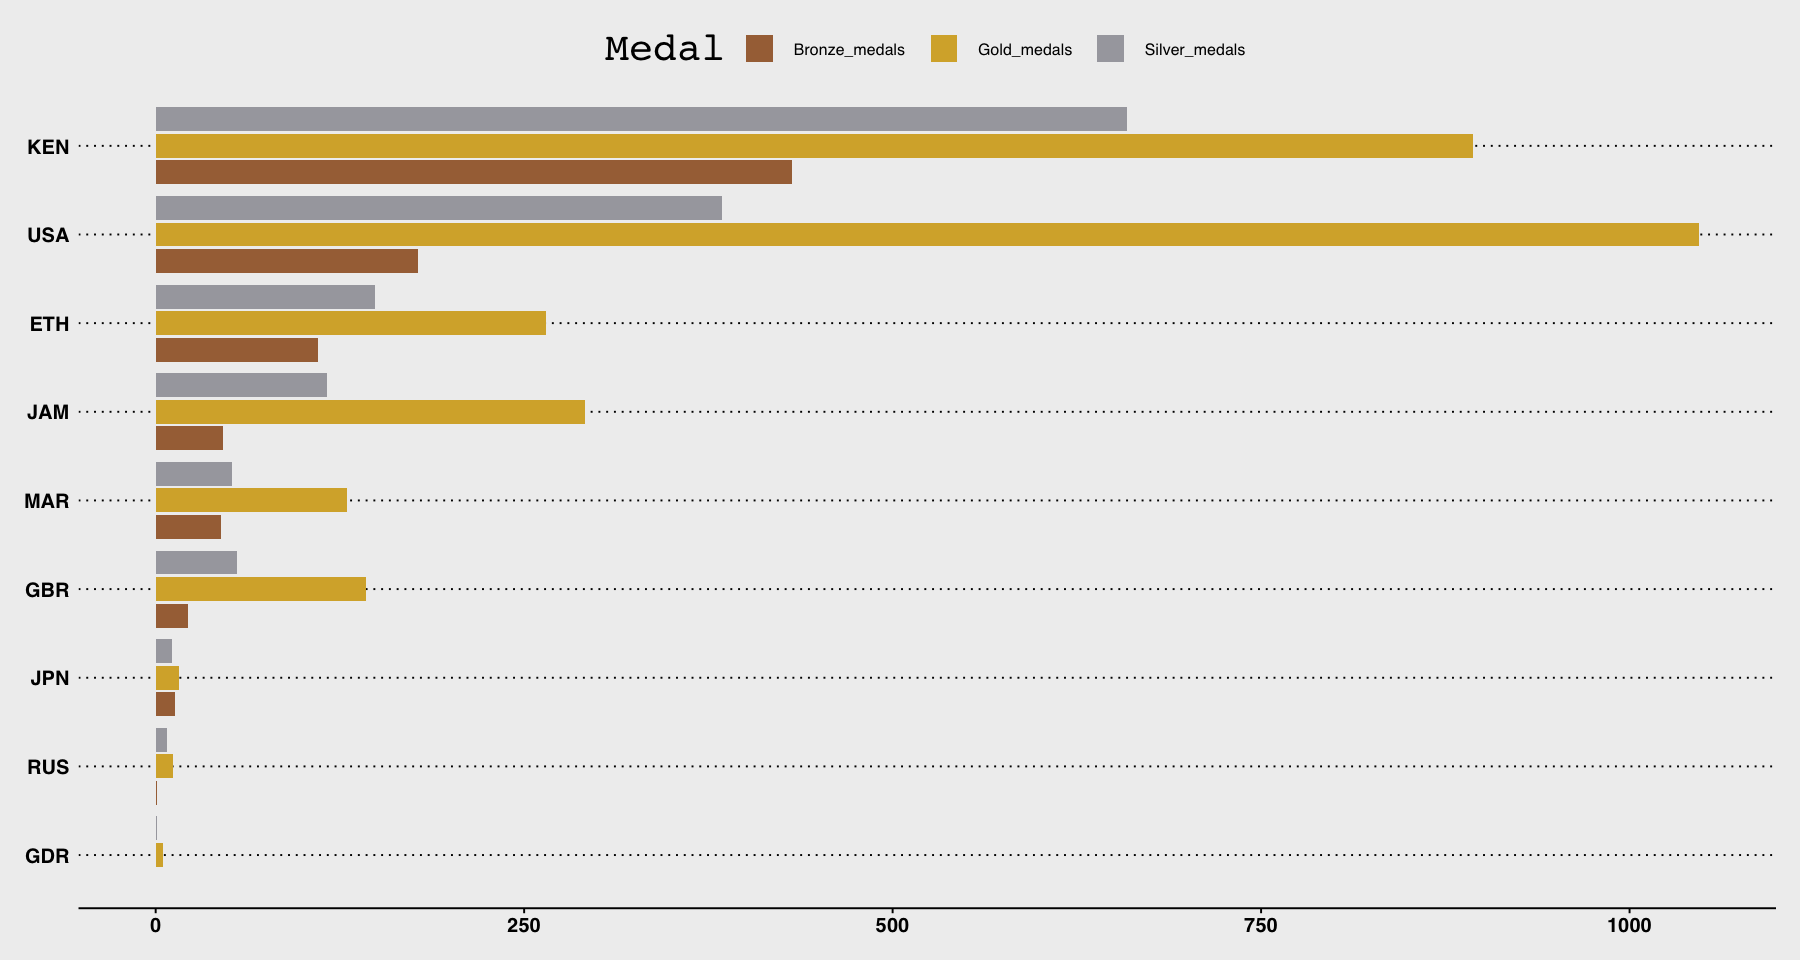

In [1109]:
ggplot(data = performance_runners_men, mapping = aes(x = reorder(Country,Count), y = Count,fill = Medal)) + 
geom_bar(stat = "identity",position = "dodge2") + coord_flip() + theme_wsj(color = "gray") + scale_fill_manual(values = color_per_medal)

In [1110]:
performance_runners_women <- runners_women|>
group_by(Country) |>
filter(Year <= 2016) |>
summarise(
    Gold_medals = sum(Place == 1,na.rm = TRUE),
    Silver_medals = sum(Place == 2,na.rm = TRUE),
    Bronze_medals = sum(Place == 3,na.rm = TRUE),
    Total = Gold_medals + Silver_medals + Bronze_medals
)

In [1111]:
performance_runners_women <- performance_runners_women |>
pivot_longer(
  cols = c(Gold_medals, Silver_medals, Bronze_medals),
  names_to = "Medal",
  values_to = "Count"
)
performance_runners_women <-as.data.frame(performance_runners_women)
performance_runners_women <- performance_runners_women |> filter(Country %in% performance_country_filtered)

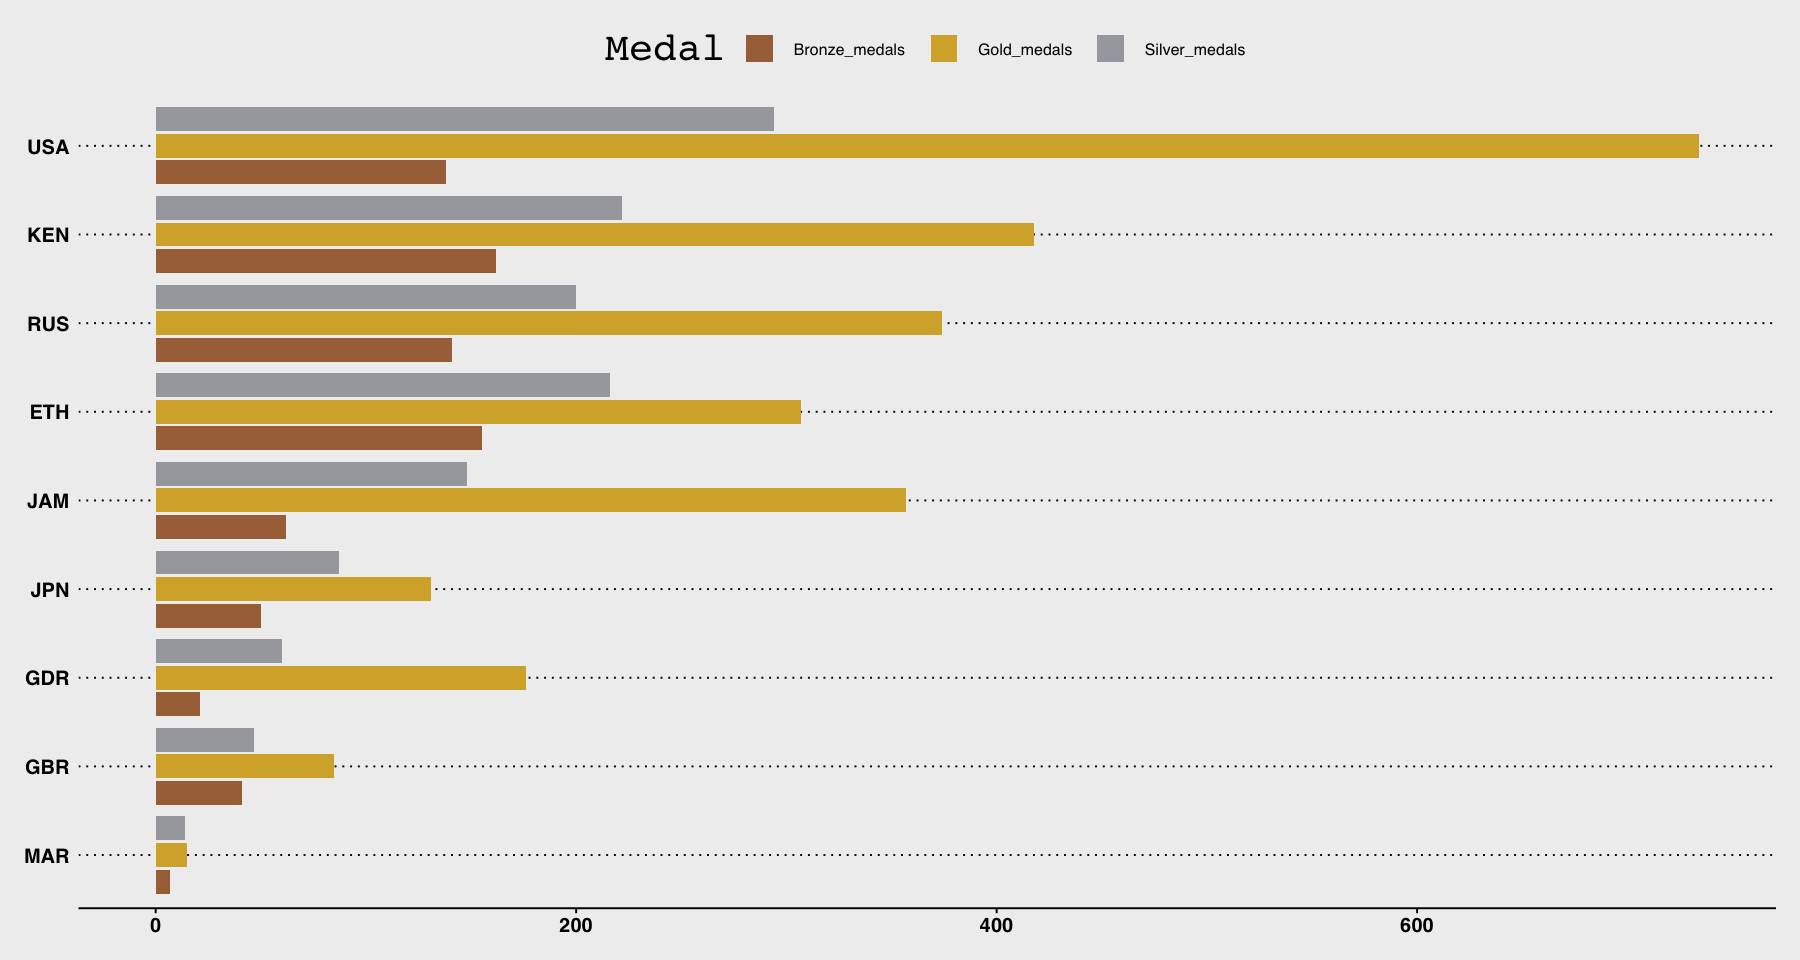

In [1112]:
ggplot(data = performance_runners_women, mapping = aes(x = reorder(Country,Count), y = Count,fill = Medal)) + 
geom_bar(stat = "identity",position = "dodge2") + coord_flip() + theme_wsj(color = "gray") + scale_fill_manual(values = color_per_medal)

## Relação entre a idade e velocidade

In [1113]:
fastest_time <- runners_data |>
group_by(Time,Age) |>
arrange(Time,sort = TRUE)

temp_list <- c()
temp_list_1 <- c("Age<=20","20<Age<25","25<Age<30","30<Age<35","Age>=35")
 
top_100_fastest_time <- head(fastest_time,100)
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age <= 20) |> nrow())
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age <= 25 & Age >= 20 ) |> nrow())
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age <= 30 & Age >= 25 ) |> nrow())
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age <= 35 & Age >= 30 ) |> nrow())
temp_list <- append(temp_list,top_100_fastest_time |> filter(Age >= 35) |> nrow())

age_top_100_fastest_time <- data.frame(Age = temp_list_1,Total = temp_list)

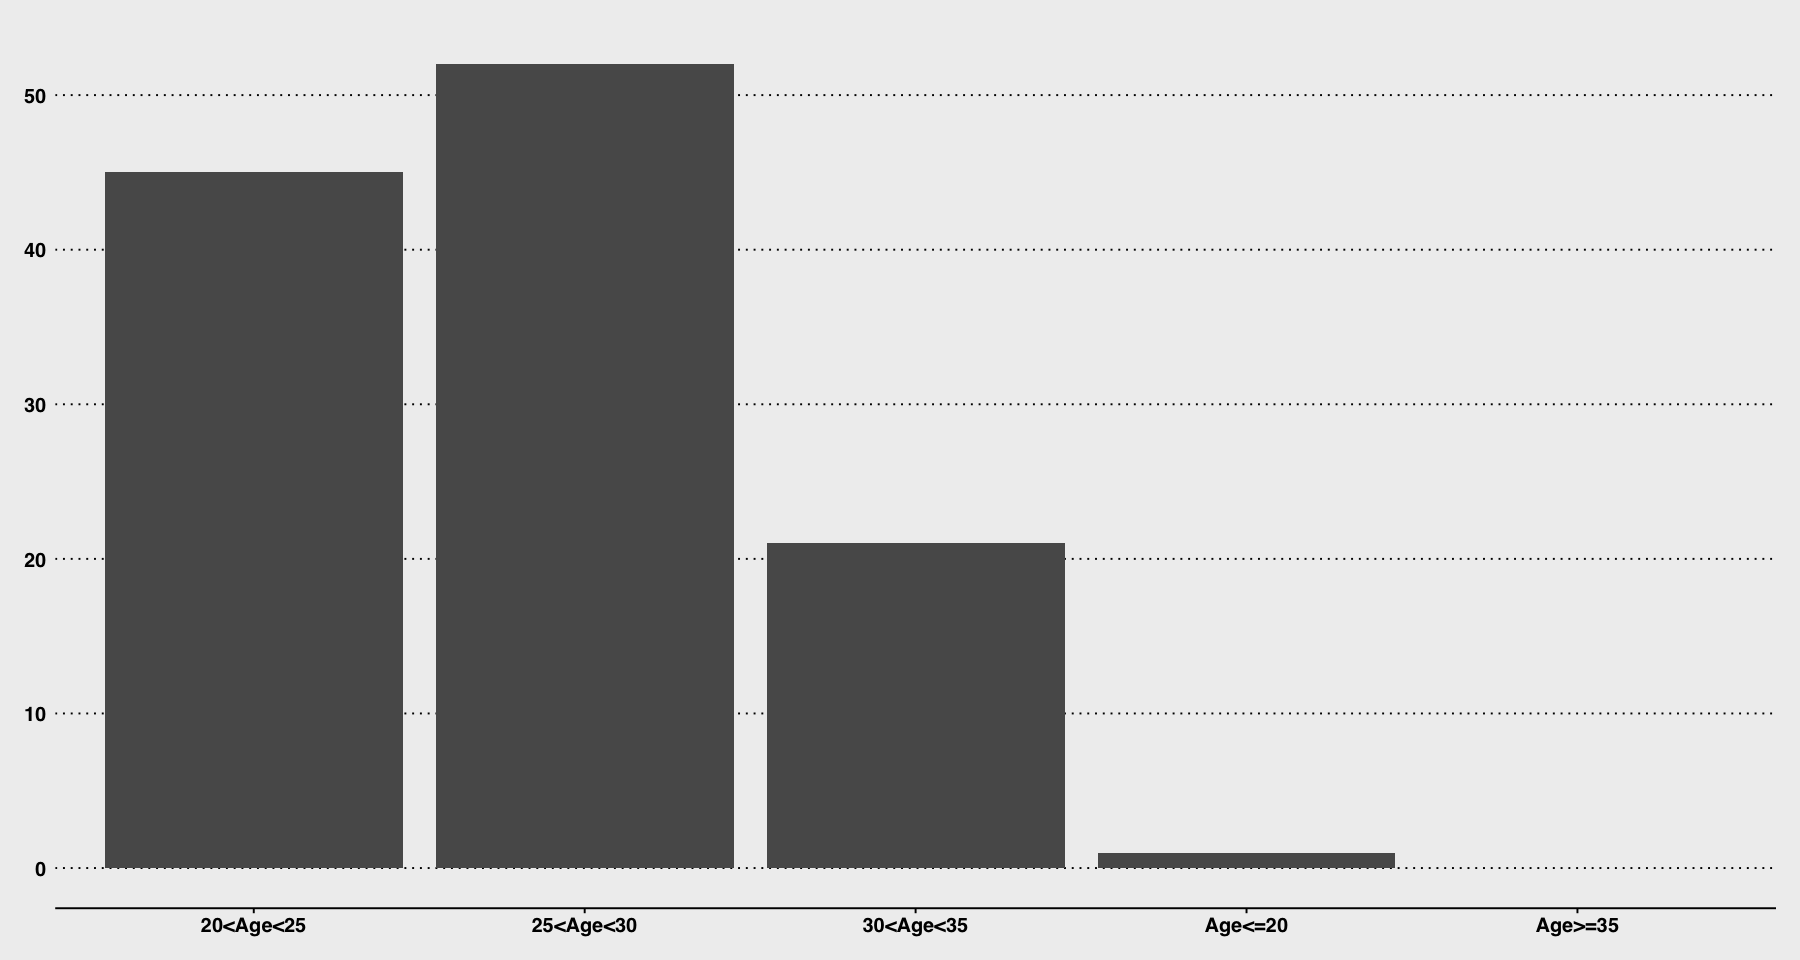

In [1114]:
ggplot(data = age_top_100_fastest_time, mapping = aes(x = Age, y = Total)) + geom_bar(stat = "identity")  + theme_wsj(color = "gray")

## Corredores com a maior quantidade de medalhas

In [1115]:
most_medals_men <- runners_men |>
group_by(Name) |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)

most_medals_men <- head(most_medals_men,10)
head(most_medals_men)
most_medals_men_list = as.list(most_medals_men$Name)

Name             n  
1 Michael Johnson  122
2 Usain Bolt       107
3 Asafa Powell     106
4 LaShawn Merritt   97
5 Frank Fredericks  81
6 Justin Gatlin     78

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


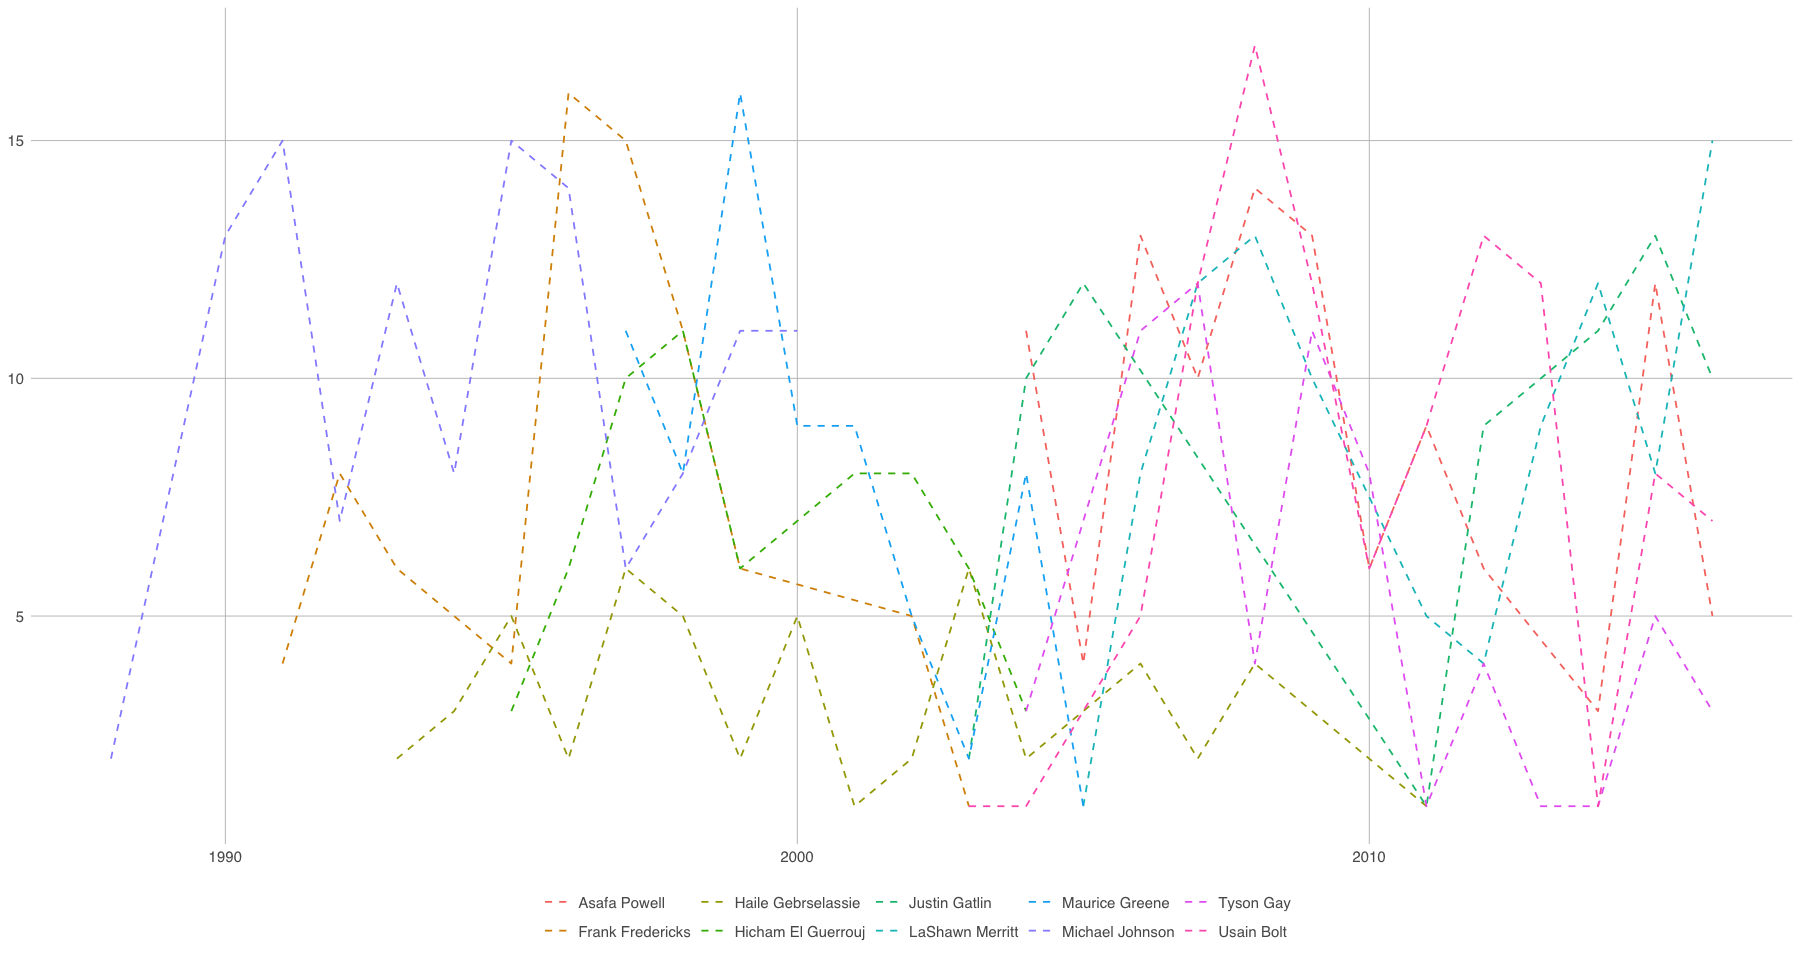

In [1116]:
medals_over_time_fastest_men <- runners_men |>
filter(Name %in% most_medals_men_list) |>
group_by(Year) |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)

ggplot(data = medals_over_time_fastest_men, mapping = aes(x = Year, y = n,color = Name)) + geom_line(linetype = "dashed") +
theme_excel_new()

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


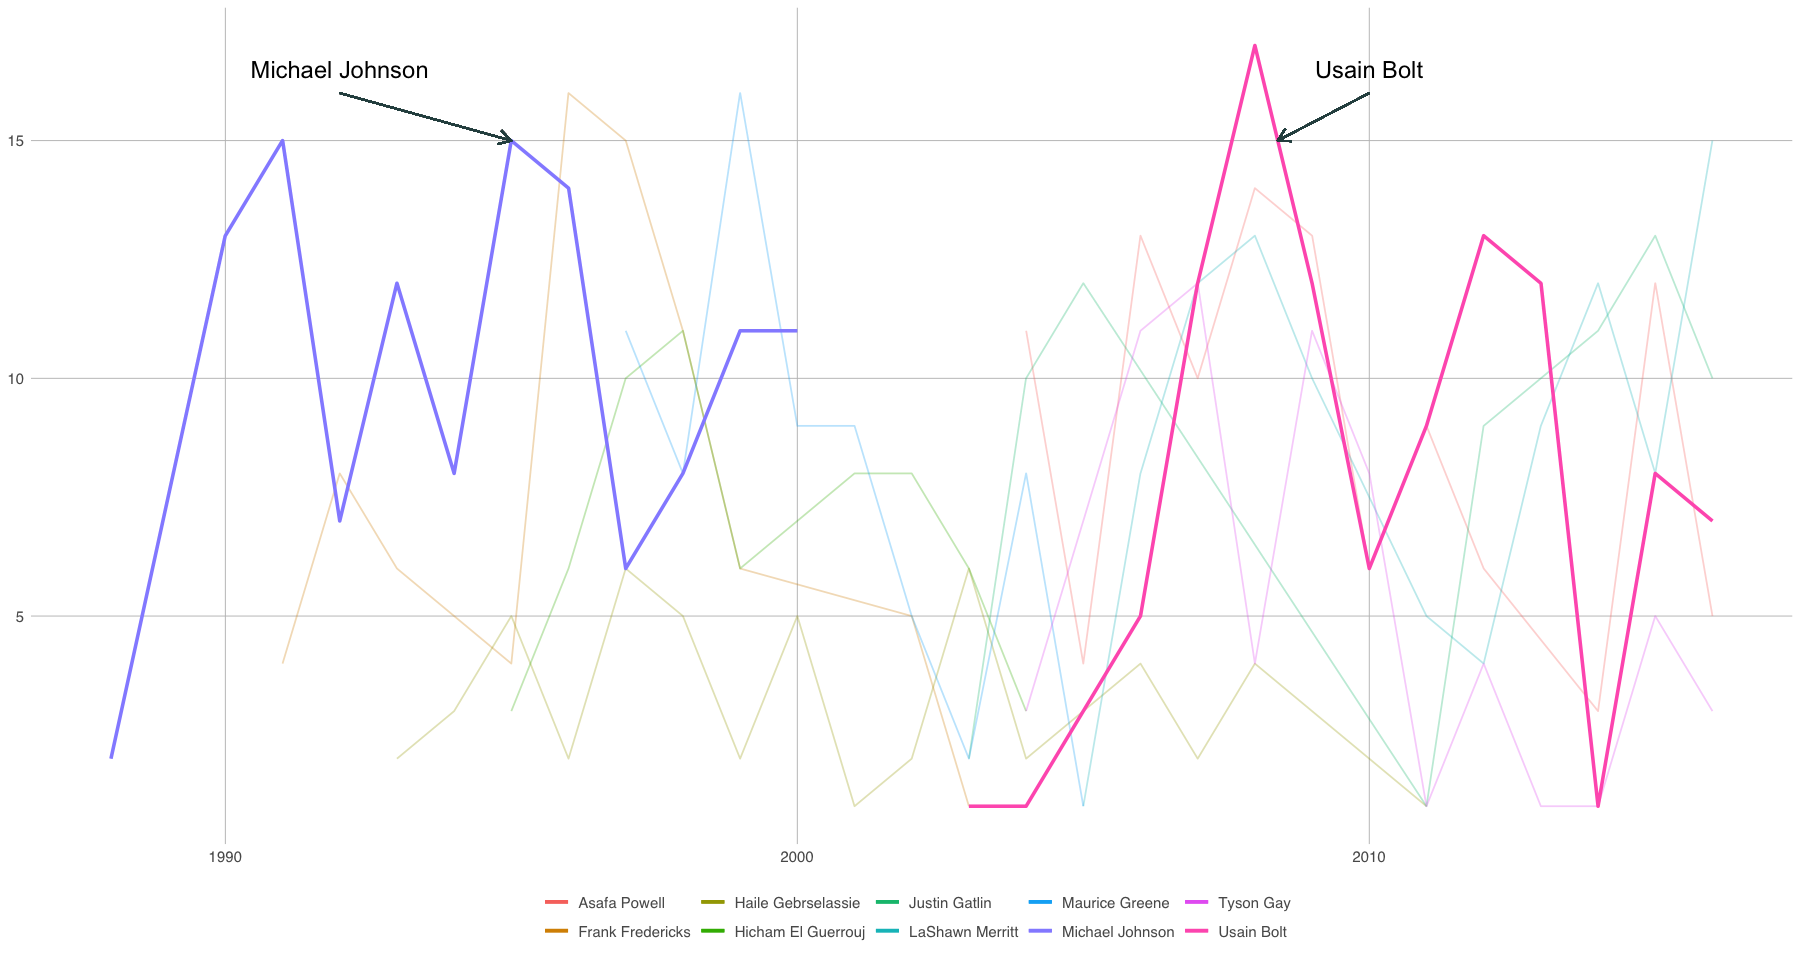

In [1117]:
medals_over_time_fastest_men <- runners_men |>
filter(Name %in% most_medals_men_list) |>
group_by(Year) |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)

ggplot(data = medals_over_time_fastest_men, mapping = aes(x = Year, y = n,color = Name)) + geom_line(alpha = 0.3) +
geom_line(data = subset(medals_over_time_fastest_men, Name == "Usain Bolt"), size = 1) +
geom_line(data = subset(medals_over_time_fastest_men, Name == "Michael Johnson"), size = 1) +
theme_excel_new() + annotate("text", x = 1992, y = 16.5, label = "Michael Johnson",size =5) +
geom_segment(
    aes(x = 1992, y =16 , xend = 1995, yend = 15),
    arrow = arrow(length = unit(0.3, "cm")),
    color = "#2E4F4F",
    size = 0.5
)   + annotate("text", x = 2010, y = 16.5, label = "Usain Bolt",size =5) +
geom_segment(
    aes(x = 2010, y = 16 , xend = 2008.4, yend = 15),
    arrow = arrow(length = unit(0.3, "cm")),
    color = "#2E4F4F",
    size = 0.5
)   

In [1118]:
most_medals_women <- runners_women |>
group_by(Name) |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)

most_medals_women <- head(most_medals_women,10)
head(most_medals_women)
most_medals_women_list = as.list(most_medals_women$Name)

Name                    n  
1 Merlene Ottey           174
2 Gwen Torrence            95
3 Veronica Campbell-Brown  84
4 Sanya Richards-Ross      83
5 Maria Mutola             80
6 Allyson Felix            79

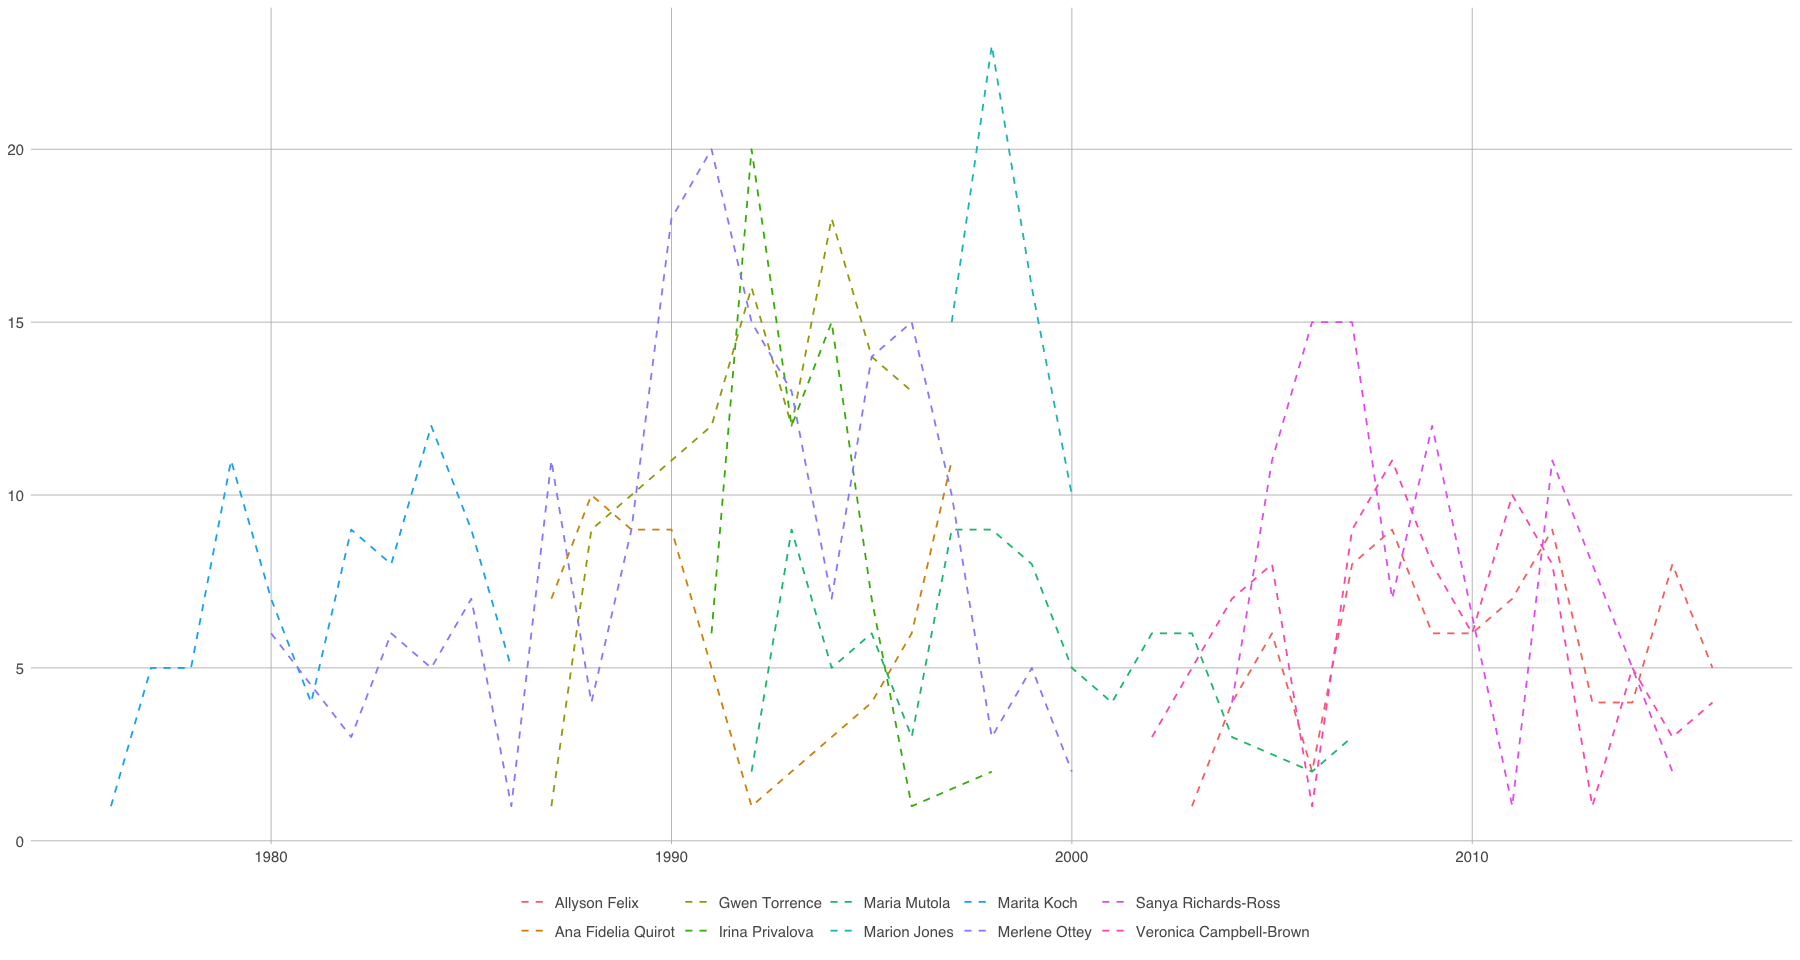

In [1119]:
medals_over_time_fastest_women <- runners_women |>
filter(Name %in% most_medals_women_list) |>
group_by(Year) |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)

ggplot(data = medals_over_time_fastest_women, mapping = aes(x = Year, y = n,color = Name)) + geom_line(linetype = "dashed") +
theme_excel_new()

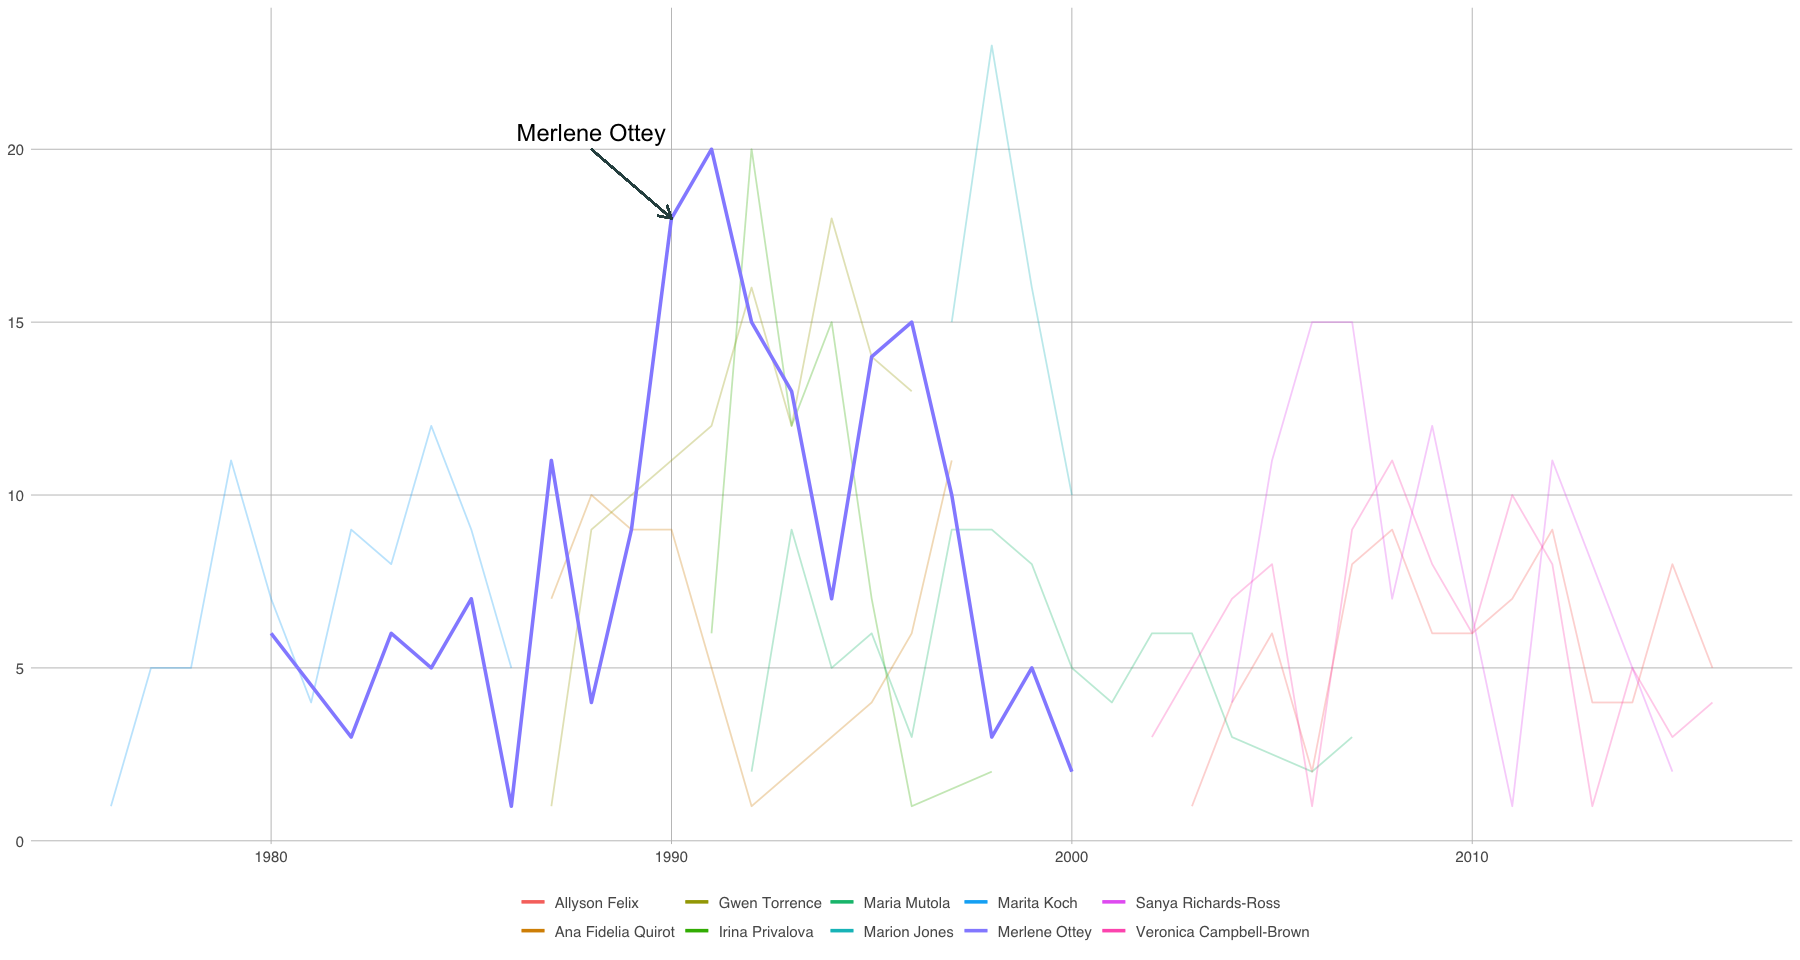

In [1120]:
ggplot(data = medals_over_time_fastest_women, mapping = aes(x = Year, y = n,color = Name)) + geom_line(alpha = 0.3) +
geom_line(data = subset(medals_over_time_fastest_women, Name == "Merlene Ottey"), size = 1) +
theme_excel_new() + annotate("text", x = 1988, y = 20.5, label = "Merlene Ottey",size =5) +
geom_segment(
    aes(x = 1988, y = 20, xend = 1990, yend = 18),
    arrow = arrow(length = unit(0.3, "cm")),
    color = "#2E4F4F",
    size = 0.5
)   

## Melhores competidores dos 100 metros

In [1121]:
head(
runners_men |>
filter(Event == "100 m") |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)
)
top_100m_men <- head(runners_men,15)
top_100m_men_list <- as.list(top_100m_men$Name)

Name           n  
1 Asafa Powell   101
2 Justin Gatlin   57
3 Maurice Greene  57
4 Usain Bolt      52
5 Tyson Gay       42
6 Mike Rodgers    41

In [1122]:
performance_runners_men <- runners_men |>
group_by(Name) |>
filter(Year <= 2016) |>
summarise(
    Gold_medals = sum(Place == 1,na.rm = TRUE),
    Silver_medals = sum(Place == 2,na.rm = TRUE),
    Bronze_medals = sum(Place == 3,na.rm = TRUE),
    Total = Gold_medals + Silver_medals + Bronze_medals
)

In [1123]:
head(performance_runners_men)
top_100m_men_list

Name             Gold_medals Silver_medals Bronze_medals Total
1 Aaron Armstrong  1           0             0             1    
2 Aaron Brown      4           2             0             6    
3 Aaron Ernest     1           0             0             1    
4 Abadi Hadis      0           0             1             1    
5 Abayneh Ayele    0           0             0             0    
6 Abdalelah Haroun 4           1             0             5

[[1]]
[1] "David Rudisha"

[[2]]
[1] "David Rudisha"

[[3]]
[1] "David Rudisha"

[[4]]
[1] "Wilson Kipketer"

[[5]]
[1] "Wilson Kipketer"

[[6]]
[1] "David Rudisha"

[[7]]
[1] "David Rudisha"

[[8]]
[1] "David Rudisha"

[[9]]
[1] "Sebastian Coe"

[[10]]
[1] "Wilson Kipketer"

[[11]]
[1] "Nijel Amos"

[[12]]
[1] "David Rudisha"

[[13]]
[1] "Joaquim Cruz"

[[14]]
[1] "Wilson Kipketer"

[[15]]
[1] "David Rudisha"

In [1124]:
performance_runners_men <- performance_runners_men |>
pivot_longer(
  cols = c(Gold_medals, Silver_medals, Bronze_medals),
  names_to = "Medal",
  values_to = "Count"
)
performance_runners_men <-as.data.frame(performance_runners_men)
performance_runners_men <- performance_runners_men |> filter(Name %in% top_100m_men_list)

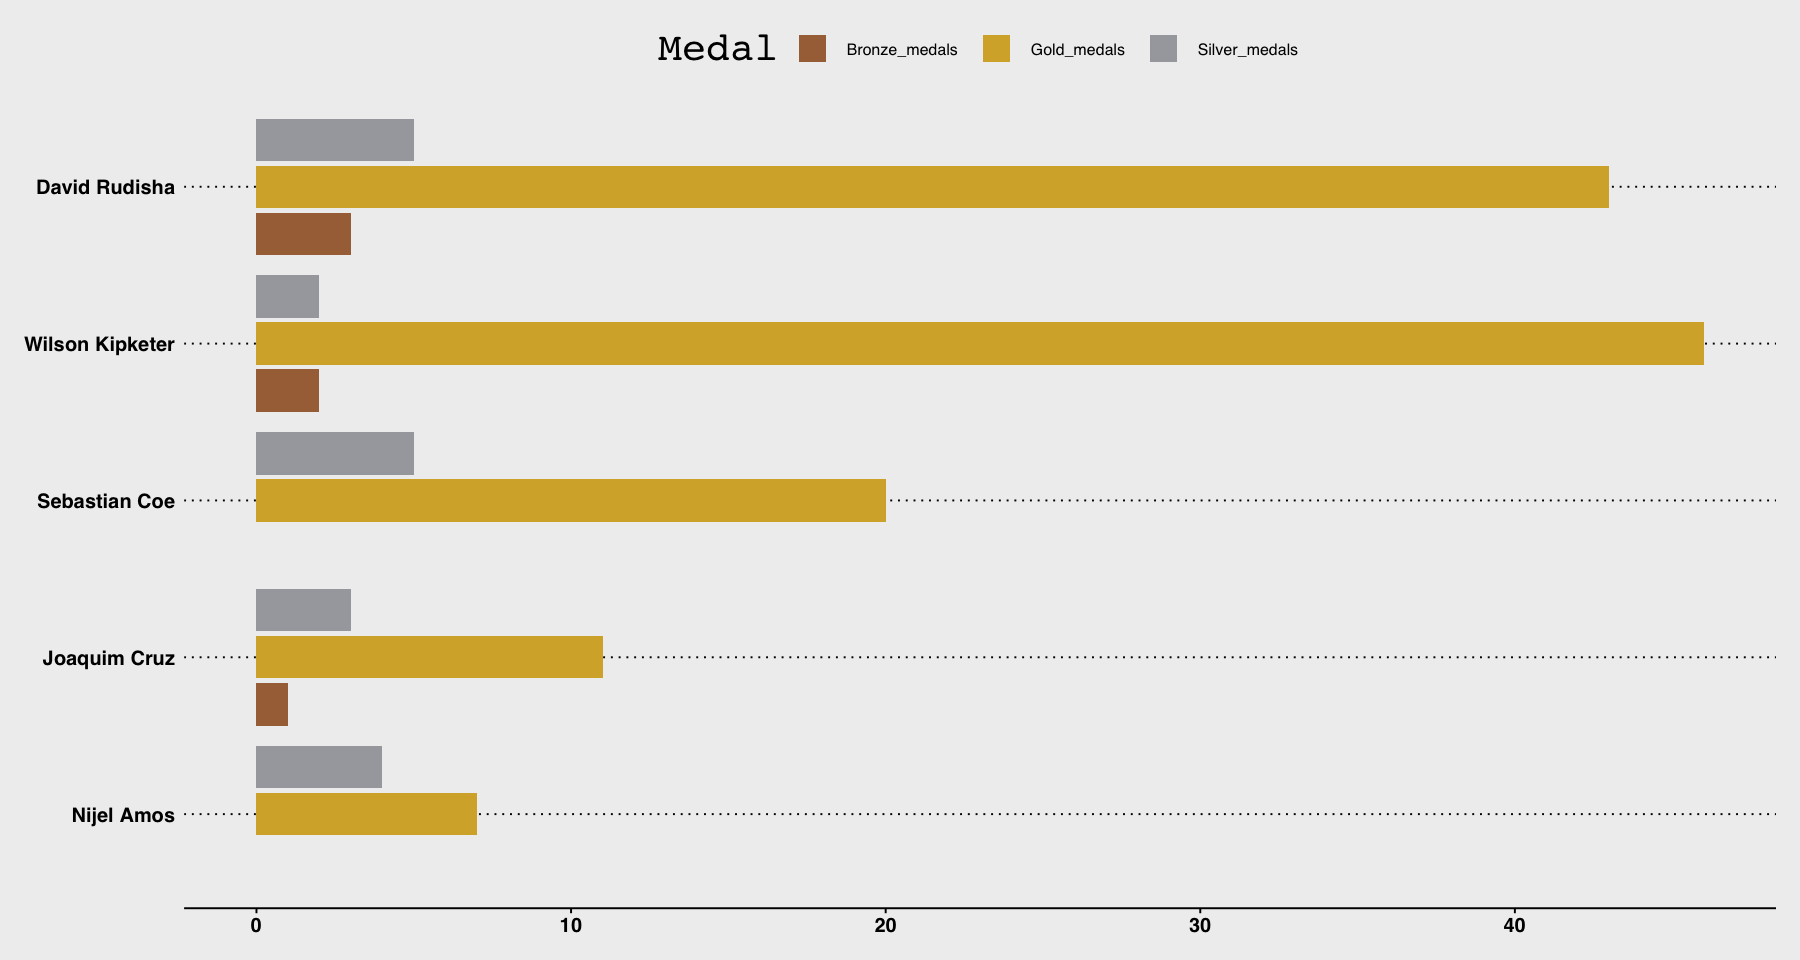

In [1125]:
ggplot(data = performance_runners_men, mapping = aes(x = reorder(Name,Count), y = Count,fill = Medal)) + 
geom_bar(stat = "identity",position = "dodge2") + coord_flip() + theme_wsj(color = "gray") + scale_fill_manual(values = color_per_medal)

In [1126]:
head(
runners_women |>
filter(Event == "100 m") |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE)
)
top_100m_women <- head(runners_women,15)
top_100m_women_list <- as.list(top_100m_women$Name)

Name                    n 
1 Merlene Ottey           85
2 Veronica Campbell-Brown 54
3 Carmelita Jeter         46
4 Gwen Torrence           45
5 Marion Jones            43
6 Shelly-Ann Fraser-Pryce 43

In [1127]:
performance_runners_women <- runners_women |>
group_by(Name) |>
filter(Year <= 2016) |>
summarise(
    Gold_medals = sum(Place == 1,na.rm = TRUE),
    Silver_medals = sum(Place == 2,na.rm = TRUE),
    Bronze_medals = sum(Place == 3,na.rm = TRUE),
    Total = Gold_medals + Silver_medals + Bronze_medals
)

In [1128]:
head(performance_runners_women)
top_100m_women_list

Name            Gold_medals Silver_medals Bronze_medals Total
1 Ababel Yeshaneh 0           1             0             1    
2 Abeba Aregawi   5           3             0             8    
3 Abebe Arigawi   5           1             2             8    
4 Abebe Tola      0           0             0             0    
5 Abebech Afework 1           1             1             3    
6 Abebu Gelan     0           0             0             0

[[1]]
[1] "Marita Koch"

[[2]]
[1] "Jarmila Kratochvílová"

[[3]]
[1] "Marita Koch"

[[4]]
[1] "Marita Koch"

[[5]]
[1] "Marita Koch"

[[6]]
[1] "Marie-José Pérec"

[[7]]
[1] "Marita Koch"

[[8]]
[1] "Olga Bryzgina"

[[9]]
[1] "Jarmila Kratochvílová"

[[10]]
[1] "Tatána Kocembová"

[[11]]
[1] "Marita Koch"

[[12]]
[1] "Olga Bryzgina"

[[13]]
[1] "Jarmila Kratochvílová"

[[14]]
[1] "Cathy Freeman"

[[15]]
[1] "Olga Bryzgina"

In [1129]:
performance_runners_women <- performance_runners_women |>
pivot_longer(
  cols = c(Gold_medals, Silver_medals, Bronze_medals),
  names_to = "Medal",
  values_to = "Count"
)
performance_runners_women <-as.data.frame(performance_runners_women)
performance_runners_women <- performance_runners_women |> filter(Name %in% top_100m_women_list)

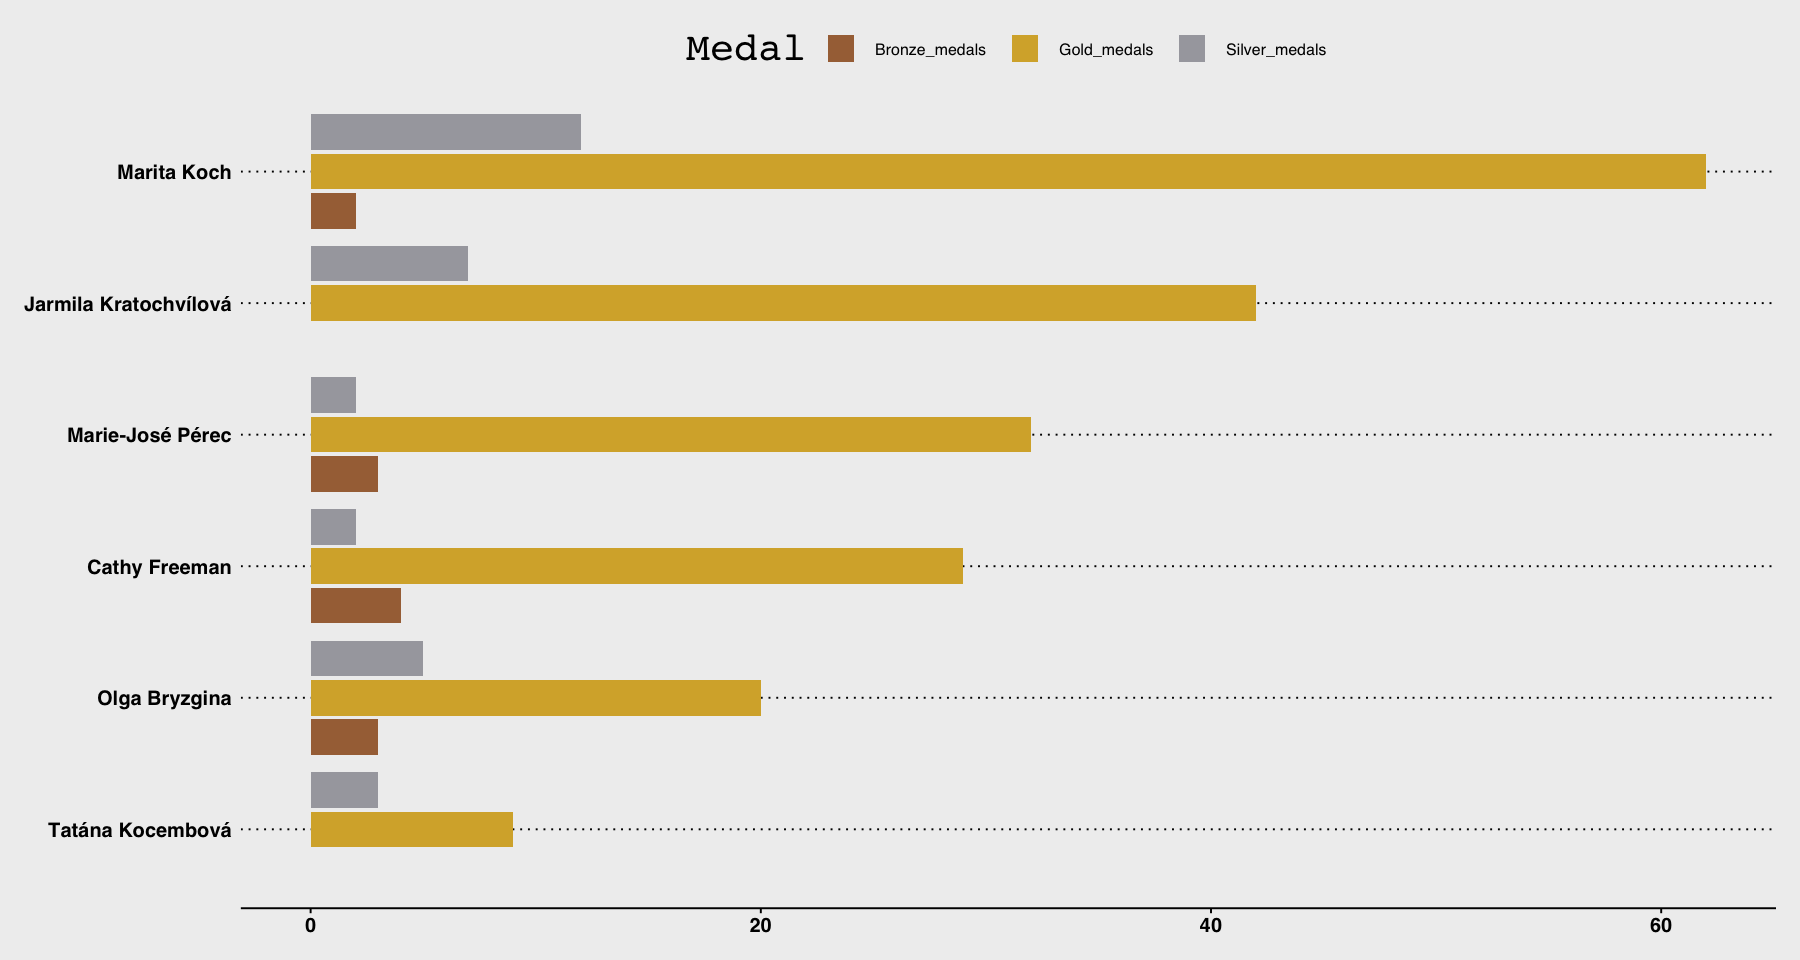

In [1130]:
ggplot(data = performance_runners_women, mapping = aes(x = reorder(Name,Count), y = Count,fill = Medal)) + 
geom_bar(stat = "identity",position = "dodge2") + coord_flip()  + theme_wsj(color = "gray") + scale_fill_manual(values = color_per_medal)

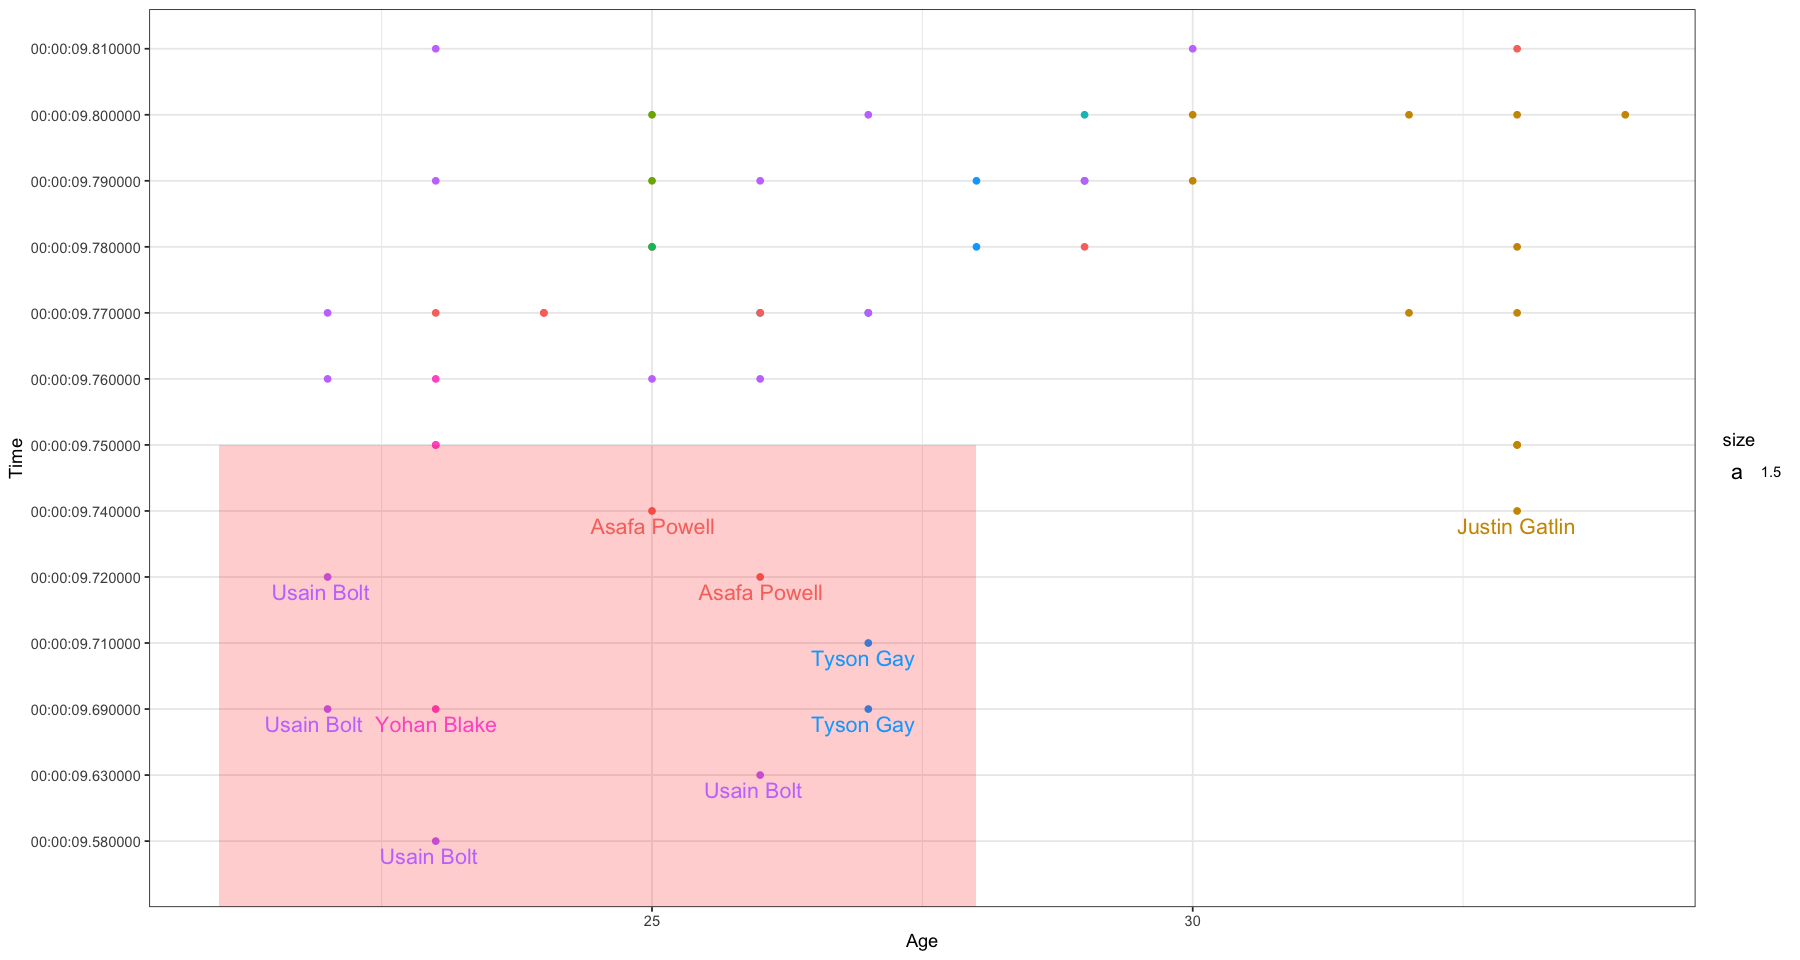

In [1131]:
 fastest_time_100m_men <- runners_men |>
filter(Event == "100 m") |>
arrange(Time)
top_50_fastest_time_100m_men <- head(fastest_time_100m_men,50)

ggplot(data = top_50_fastest_time_100m_men, mapping = aes(x = Age,y = Time,color = Name)) + geom_point(mapping = aes(group = Name))  +
annotate(
    geom = "rect", xmin = 21, xmax = 28,
    ymin = 0, ymax = 7, fill = "red", alpha = 0.2
) + theme_bw() + guides(color =  FALSE) +
geom_text_repel(data = subset(top_50_fastest_time_100m_men, Time <= "00:00:09.740000"), mapping = aes(label = Name,size = 1.5, vjust = 0.2,hjust = 0.2) )



## Melhores competidores das maratonas

In [1132]:
head(
runners_men |>
filter(Event == "Marathon") |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE, .keep = Time)
,3)

Name                  .keep    n
1 Abel Kirui            02:07:38 2
2 Paul Biwott           02:08:17 2
3 Abdelkader El Mouaziz 02:07:11 1

In [1133]:
Abel_Kirui_runner <- subset(runners_data, Name == "Abel Kirui" & Event == "Marathon")

In [1134]:
head(
runners_women |>
filter(Event == "Marathon") |>
filter(Place == 1 | Place == 2 | Place == 3) |>
count(Name,sort = TRUE, .keep = Time)
,3)

Name              .keep    n
1 Aselefech Mergia  02:25:32 2
2 Jelena Prokopcuka 02:24:07 2
3 Mare Dibaba       02:19:52 2

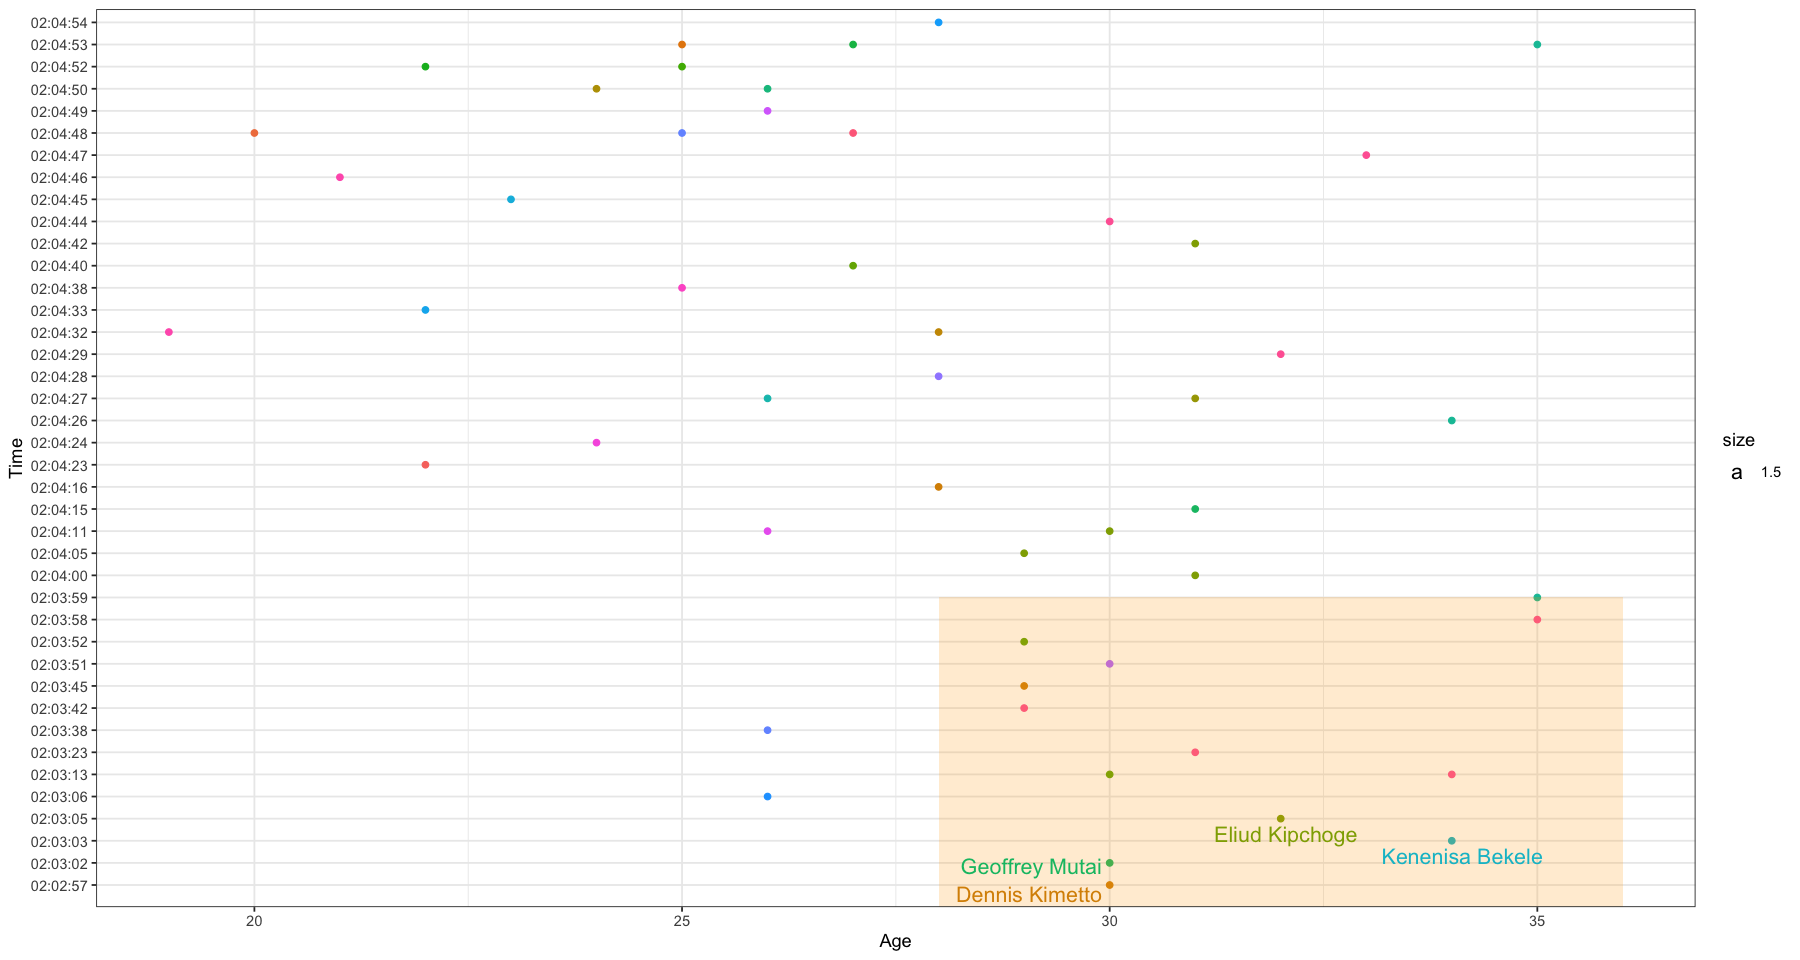

In [1135]:
fastest_time_marathon_men <- runners_men |>
filter(Event == "Marathon") |>
arrange(Time)
top_50_fastest_time_marathon_men <- head(fastest_time_marathon_men,50)

ggplot(data = top_50_fastest_time_marathon_men, mapping = aes(x = Age, Time,color = Name)) + geom_point(mapping = aes(group = Name)) +
annotate(
    geom = "rect", xmin = 28, xmax = 36,
    ymin = 0, ymax = 14, fill = "orange", alpha = 0.2
    ) + theme_bw() + guides(color =  FALSE) +
geom_text_repel(data = subset(top_50_fastest_time_marathon_men, Time <= "02:03:05"), mapping = aes(label = Name,size = 1.5, vjust = 0.2,hjust = 0.2) )


# Evolução dos corredores

In [1136]:
performance_country_filtered <- head(performance_country$Country,5)
performance_country_filtered <- as.list(performance_country_filtered)
countries_performance_per_year <- runners_data |>
group_by(Country,Year) |>
filter(Place == 1 | Place == 2 | Place == 3, Year <= 2016) |>
count(Country,sort =  TRUE) |>
rename(total = n) 
top_countries_performance_per_year <- countries_performance_per_year |> filter(Country %in% performance_country_filtered)
head(top_countries_performance_per_year)

Country Year total
1 KEN     2011 199  
2 KEN     2012 198  
3 KEN     2016 190  
4 KEN     2014 183  
5 KEN     2015 174  
6 KEN     2010 168

In [1137]:
top_countries_performance_per_year$Year <- as.Date(top_countries_performance_per_year$Year)

In [1138]:
glimpse(top_countries_performance_per_year)

Rows: 203
Columns: 3
Groups: Country, Year [203]
$ Country <chr> "KEN", "KEN", "KEN", "KEN", "KEN", "KEN", "USA", "KEN", "KEN",…
$ Year    <date> 1975-07-05, 1975-07-06, 1975-07-10, 1975-07-08, 1975-07-09, 1…
$ total   <int> 199, 198, 190, 183, 174, 168, 166, 143, 143, 131, 123, 118, 11…


In [1139]:
ggplot(data = top_countries_performance_per_year, mapping = aes(x = Year, y = total, color = Country)) +
scale_x_date(date_labels = "%Y", date_breaks = "1 year") + 
geom_line(size = 2, alpha = 0.75) + theme_minimal() + transition_reveal(Year) +  theme(plot.margin = margin(5.5, 40, 5.5, 5.5)) 

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


<img src="data:image/gif;base64,R0lGODlh4AHgAfYAAAMDAwwMDBMTExsbGyMjIysrKzQ0NDs7O0NDQ0tLS1NTU1xcXGVlZWtr
a3R0dHt7e62xRLK1T7a6Wud49FLIj1zLlWbOnHvVqU+39lm79mO/93XG+H3K+IODg42NjZSU
lJubm6SkpKurq7Ozs7u7u/aHhPaNiveVkvebmYPYr4ras+mD9ajjx63lyrPnzoXN+arc+7Df
+7Tg+8LCws3NzdPT09vb2/3Z2Ozt1e7u2O/w2+bm5u3t7frk/fPz8/z89/33/v///wAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQAAACH/C0lDQ1JH
QkcxMDEy/wAAB8hhcHBsAiAAAG1udHJSR0IgWFlaIAfZAAIAGQALABoAC2Fjc3BBUFBMAAAA
AGFwcGwAAAAAAAAAAAAAAAAAAAAAAAD21gABAAAAANMtYXBwbAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC2Rlc2MAAAEIAAAAb2RzY20AAAF4AAAF
imNwcnQAAAcEAAAAOHd0cHQAAAc8AAAAFHJYWVoAAAdQAAAAFGdYWVoAAAdkAAAAFGJYWVoA
AAd4AAAAFHJUUkMAAAeMAAAADmNoYWQAAAecAAAALGJUUkMAAAeMAAAADmdUUv9DAAAHjAAA
AA5kZXNjAAAAAAAAABRHZW5lcmljIFJHQiBQcm9maWxlAAAAAAAAAAAAAAAUR2VuZXJpYyBS
R0IgUHJvZmlsZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAbWx1YwAAAAAAAAAfAAAADHNrU0sAAAAoAAABhGRhREsAAAAkAAABrGNhRVMAAAAk
AAAB0HZpVk4AAAAkAAAB9HB0QlIAAAAmAAACGHVrVUEAAAAqAAACPmZyRlUAAAAoAAACaGh1
SFUAAAAoAAACkHpoVFcAAAASAAACuGtvS1IAAAAWAAD/AspuYk5PAAAAJgAAAuBjc0NaAAAA
IgAAAwZoZUlMAAAAHgAAAyhyb1JPAAAAJAAAA0ZkZURFAAAALAAAA2ppdElUAAAAKAAAA5Zz
dlNFAAAAJgAAAuB6aENOAAAAEgAAA75qYUpQAAAAGgAAA9BlbEdSAAAAIgAAA+pwdFBPAAAA
JgAABAxubE5MAAAAKAAABDJlc0VTAAAAJgAABAx0aFRIAAAAJAAABFp0clRSAAAAIgAABH5m
aUZJAAAAKAAABKBockhSAAAAKAAABMhwbFBMAAAALAAABPBydVJVAAAAIgAABRxlblVTAAAA
JgAABT5hckVHAAAAJgAABWQA/1YBYQBlAG8AYgBlAGMAbgD9ACAAUgBHAEIAIABwAHIAbwBm
AGkAbABHAGUAbgBlAHIAZQBsACAAUgBHAEIALQBwAHIAbwBmAGkAbABQAGUAcgBmAGkAbAAg
AFIARwBCACAAZwBlAG4A6AByAGkAYwBDHqUAdQAgAGgA7ABuAGgAIABSAEcAQgAgAEMAaAB1
AG4AZwBQAGUAcgBmAGkAbAAgAFIARwBCACAARwBlAG4A6QByAGkAYwBvBBcEMAQzBDAEOwRM
BD0EOAQ5ACAEPwRABD4ERAQwBDkEOwAgAFIARwBCAFAAcgBvAGYAaQBsACAAZwDpAG4A6QBy
AGkAcf8AdQBlACAAUgBWAEIAwQBsAHQAYQBsAOEAbgBvAHMAIABSAEcAQgAgAHAAcgBvAGYA
aQBskBp1KABSAEcAQoJyX2ljz4/wx3y8GAAgAFIARwBCACDVBLhc0wzHfABHAGUAbgBlAHIA
aQBzAGsAIABSAEcAQgAtAHAAcgBvAGYAaQBsAE8AYgBlAGMAbgD9ACAAUgBHAEIAIABwAHIA
bwBmAGkAbAXkBegF1QXkBdkF3AAgAFIARwBCACAF2wXcBdwF2QBQAHIAbwBmAGkAbAAgAFIA
RwBCACAAZwBlAG4AZQByAGkAYwBBAGwAbABnAGUAbQBlAGkAbgBlAHMAIAD/UgBHAEIALQBQ
AHIAbwBmAGkAbABQAHIAbwBmAGkAbABvACAAUgBHAEIAIABnAGUAbgBlAHIAaQBjAG9mbpAa
AFIARwBCY8+P8GWHTvZOAIIsACAAUgBHAEIAIDDXMO0w1TChMKQw6wOTA7UDvQO5A7oDzAAg
A8ADwQO/A8YDrwO7ACAAUgBHAEIAUABlAHIAZgBpAGwAIABSAEcAQgAgAGcAZQBuAOkAcgBp
AGMAbwBBAGwAZwBlAG0AZQBlAG4AIABSAEcAQgAtAHAAcgBvAGYAaQBlAGwOQg4bDiMORA4f
DiUOTAAgAFIARwBCACAOFw4xDkgOJw5EDhsARwBl/wBuAGUAbAAgAFIARwBCACAAUAByAG8A
ZgBpAGwAaQBZAGwAZQBpAG4AZQBuACAAUgBHAEIALQBwAHIAbwBmAGkAaQBsAGkARwBlAG4A
ZQByAGkBDQBrAGkAIABSAEcAQgAgAHAAcgBvAGYAaQBsAFUAbgBpAHcAZQByAHMAYQBsAG4A
eQAgAHAAcgBvAGYAaQBsACAAUgBHAEIEHgQxBEkEOAQ5ACAEPwRABD4ERAQ4BDsETAAgAFIA
RwBCAEcAZQBuAGUAcgBpAGMAIABSAEcAQgAgAFAAcgBvAGYAaQBsAGUGRQZEBkEAIAYqBjkG
MQZKBkEAIABSAEcAQgAgBs8nBkQGOQYnBkUAAHRleHQAAAAAQ29weXJpZ2h0IDIwMDcgQXBw
bGUgSW5jLiwgYWxsIHJpZ2h0cyByZXNlcnZlZC4AWFlaIAAAAAAAAPNSAAEAAAABFs9YWVog
AAAAAAAAdE0AAD3uAAAD0FhZWiAAAAAAAABadQAArHMAABc0WFlaIAAAAAAAACgaAAAVnwAA
uDZjdXJ2AAAAAAAAAAEBzQAAc2YzMgAAAAAAAQxCAAAF3v//8yYAAAeSAAD9kf//+6L///2j
AAAD3AAAwGwALAAAAADgAeABAAf/gEGCg4SFhoeIiYqLjI2Oj5CRkpOUlZaXmJmam5ydnp+g
oaKjpKWmp6ipqqusra6vsLGys7S1tre4ubq7vL2+v8DBwsPExcbHyMnKy8zNzs/Q0dLT1NXW
19jZ2tvc3d7f4OHi4+Tl5ufo6err7O3u7/Dx8vP09fb3+Pn6+/z9/v8AAwocSLCgwYMIEypc
yLBhtho+BtXYIcgHjYgOM2os1UDEAxpBHIRoYINHg5EbU6rktGNGEBoeanwIUsNDCJchSBTy
wbOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdipTfRxIigvBw4MFGEKyFeIjl4WOs2bNiy5pV
qxYt2rZp/+O6hTuWrtyzdPPedbsW716+f9nytUt2ruG+iAkfrvsXsN7CixH7fTuZMWTAli0r
prwWY74HWcHu6NA1yIgRK1OrnuTAZRAbHV6CEKETBMjVuHMjGpGgQQMQQUA8aMCzw4PYupMr
Z+R5ufPn0KNLn069uvXr2LNr3869u/fv4MOLH0++vPnz6NOrX8++vfv38OPLn0+/vv37+PPr
38+/v///AAYo4IAEFmjggQgmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYcdujhhyCGKOKIJJZo
4okopqjiiiy26OKLMMYo44w01m

In [1140]:
p <- ggplot(data = top_countries_performance_per_year, mapping = aes(x = Year, y = total, color = Country)) +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  geom_line(size = 2, alpha = 0.75) +
  theme_minimal() +
  transition_reveal(Year) + theme_wsj(color = "gray")
animate(p, width = 900, height = 700) 

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


<img src="data:image/gif;base64,R0lGODlhhAO8AvUAAAICAgwMDBQUFBwcHCQkJCsrKzQ0NDw8PENDQ0xMTFRUVFxcXGRkZGxs
bHV1dXx8fKisP6quRrC0VfGCf+Jz703Dikqy8YODg4yMjJSUlJubm6SkpKysrLOzs7u7u+6v
rqDYvOSS7rTdyZLL7r/c7cHBwczMzNPT09zc3OzQz+ze3dTl3eLj1eXl2erb7Nnm4NPj7Nnl
7OPj4+vj4+Lp5uvo5+rh7OXp6+vr6wAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8L
TkVUU0NBUEUyLjADAQAAACH/C0lDQ1JHQkcxMDEy/wAAB8hhcHBsAiAAAG1udHJSR0IgWFla
IAfZAAIAGQALABoAC2Fjc3BBUFBMAAAAAGFwcGwAAAAAAAAAAAAAAAAAAAAAAAD21gABAAAA
ANMtYXBwbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
C2Rlc2MAAAEIAAAAb2RzY20AAAF4AAAFimNwcnQAAAcEAAAAOHd0cHQAAAc8AAAAFHJYWVoA
AAdQAAAAFGdYWVoAAAdkAAAAFGJYWVoAAAd4AAAAFHJUUkMAAAeMAAAADmNoYWQAAAecAAAA
LGJUUkMAAAeMAAAADmdUUv9DAAAHjAAAAA5kZXNjAAAAAAAAABRHZW5lcmljIFJHQiBQcm9m
aWxlAAAAAAAAAAAAAAAUR2VuZXJpYyBSR0IgUHJvZmlsZQAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbWx1YwAAAAAAAAAfAAAADHNrU0sAAAAo
AAABhGRhREsAAAAkAAABrGNhRVMAAAAkAAAB0HZpVk4AAAAkAAAB9HB0QlIAAAAmAAACGHVr
VUEAAAAqAAACPmZyRlUAAAAoAAACaGh1SFUAAAAoAAACkHpoVFcAAAASAAACuGtvS1IAAAAW
AAD/AspuYk5PAAAAJgAAAuBjc0NaAAAAIgAAAwZoZUlMAAAAHgAAAyhyb1JPAAAAJAAAA0Zk
ZURFAAAALAAAA2ppdElUAAAAKAAAA5ZzdlNFAAAAJgAAAuB6aENOAAAAEgAAA75qYUpQAAAA
GgAAA9BlbEdSAAAAIgAAA+pwdFBPAAAAJgAABAxubE5MAAAAKAAABDJlc0VTAAAAJgAABAx0
aFRIAAAAJAAABFp0clRSAAAAIgAABH5maUZJAAAAKAAABKBockhSAAAAKAAABMhwbFBMAAAA
LAAABPBydVJVAAAAIgAABRxlblVTAAAAJgAABT5hckVHAAAAJgAABWQA/1YBYQBlAG8AYgBl
AGMAbgD9ACAAUgBHAEIAIABwAHIAbwBmAGkAbABHAGUAbgBlAHIAZQBsACAAUgBHAEIALQBw
AHIAbwBmAGkAbABQAGUAcgBmAGkAbAAgAFIARwBCACAAZwBlAG4A6AByAGkAYwBDHqUAdQAg
AGgA7ABuAGgAIABSAEcAQgAgAEMAaAB1AG4AZwBQAGUAcgBmAGkAbAAgAFIARwBCACAARwBl
AG4A6QByAGkAYwBvBBcEMAQzBDAEOwRMBD0EOAQ5ACAEPwRABD4ERAQwBDkEOwAgAFIARwBC
AFAAcgBvAGYAaQBsACAAZwDpAG4A6QByAGkAcf8AdQBlACAAUgBWAEIAwQBsAHQAYQBsAOEA
bgBvAHMAIABSAEcAQgAgAHAAcgBvAGYAaQBskBp1KABSAEcAQoJyX2ljz4/wx3y8GAAgAFIA
RwBCACDVBLhc0wzHfABHAGUAbgBlAHIAaQBzAGsAIABSAEcAQgAtAHAAcgBvAGYAaQBsAE8A
YgBlAGMAbgD9ACAAUgBHAEIAIABwAHIAbwBmAGkAbAXkBegF1QXkBdkF3AAgAFIARwBCACAF
2wXcBdwF2QBQAHIAbwBmAGkAbAAgAFIARwBCACAAZwBlAG4AZQByAGkAYwBBAGwAbABnAGUA
bQBlAGkAbgBlAHMAIAD/UgBHAEIALQBQAHIAbwBmAGkAbABQAHIAbwBmAGkAbABvACAAUgBH
AEIAIABnAGUAbgBlAHIAaQBjAG9mbpAaAFIARwBCY8+P8GWHTvZOAIIsACAAUgBHAEIAIDDX
MO0w1TChMKQw6wOTA7UDvQO5A7oDzAAgA8ADwQO/A8YDrwO7ACAAUgBHAEIAUABlAHIAZgBp
AGwAIABSAEcAQgAgAGcAZQBuAOkAcgBpAGMAbwBBAGwAZwBlAG0AZQBlAG4AIABSAEcAQgAt
AHAAcgBvAGYAaQBlAGwOQg4bDiMORA4fDiUOTAAgAFIARwBCACAOFw4xDkgOJw5EDhsARwBl
/wBuAGUAbAAgAFIARwBCACAAUAByAG8AZgBpAGwAaQBZAGwAZQBpAG4AZQBuACAAUgBHAEIA
LQBwAHIAbwBmAGkAaQBsAGkARwBlAG4AZQByAGkBDQBrAGkAIABSAEcAQgAgAHAAcgBvAGYA
aQBsAFUAbgBpAHcAZQByAHMAYQBsAG4AeQAgAHAAcgBvAGYAaQBsACAAUgBHAEIEHgQxBEkE
OAQ5ACAEPwRABD4ERAQ4BDsETAAgAFIARwBCAEcAZQBuAGUAcgBpAGMAIABSAEcAQgAgAFAA
cgBvAGYAaQBsAGUGRQZEBkEAIAYqBjkGMQZKBkEAIABSAEcAQgAgBs8nBkQGOQYnBkUAAHRl
eHQAAAAAQ29weXJpZ2h0IDIwMDcgQXBwbGUgSW5jLiwgYWxsIHJpZ2h0cyByZXNlcnZlZC4A
WFlaIAAAAAAAAPNSAAEAAAABFs9YWVogAAAAAAAAdE0AAD3uAAAD0FhZWiAAAAAAAABadQAA
rHMAABc0WFlaIAAAAAAAACgaAAAVnwAAuDZjdXJ2AAAAAAAAAAEBzQAAc2YzMgAAAAAAAQxC
AAAF3v//8yYAAAeSAAD9kf//+6L///2jAAAD3AAAwGwALAAAAACEA7wCAAb/QJxwSCwaj8ik
cslsOp/QqHRKrVqv2Kx2y+16v+CweEwum8/otHrNbrvf8Lh8Tq/b7/i8fs/v+/+AgYKDhIWG
h4iJiouMjY6PkJGSk5SVlpeYmZqbnJ2en6ChoqOkpaanqKmqq6ytrq+wsbKztLW2t7i5uru8
vb6/wMHCw8TFxsfIycrLzM3Oz9DR0tPU1dbX2Nna29zd3t/g4eLj5OXm5+jp6uvs7e7v8PHy
8/T19vf4+fr7/P3+/wADChxIsKDBg+ZkdDAhA0fDOCcQSpxIcQwGAgAyBkgQwAGcCwBMVBxJ
siQUFAkACGiQgYGAjArgNADAwU+NGnRw0ruh06TP/1sMACBAMQQFxphHiG6R8dCIjJk1hTRd
wlTNzSk9i1ytslVIVzZZd4X9SfaVB5VTcWwAgHRIhwMvAxRw0FQGggIFROLgUIAAgQtDHPTF
4OFAxgIdipwwoQAABhMeTDAkguIAgQIGGl5AECAAUgeXCRhIjEPw5QNpkdRQoaKFChesWbdI
kULFWCR9/RLQgFcA3hIJStSwAWKBkxbIka9gwTw5cigcGggxIUCvYJ0ZBChdcuOF9+8rwoN3
0kE6DgwJUOT2i8IBaiEHnNyIQb++/fo3mmQQXeDAhvOACUGAEAsYQIB5Tbig4IIMLnjbEQMK
cQEGe911gAdDLGBcWRwi0v+YR0XIYECABGaEAAMKvESAXna9FBVfGCEwBAYFAICRAJxlpBcO
GmTk448CECHDAQUEAAAKjamkY2lxGYAhDhfUKFRqR6QwwZVYYvmBlk4Emd8QNQQJn3A2dCBj
ExJAoOaabKoZARQbbNjAASA2IEBUCAzQQhMgVODnn4D+KUITHMSEgQFEiRmYAAEqusQIFkQq
6aSSktAEBuZ5IEANF4CIQwA8ei

# A tibble: 100 × 7
   format width height colorspace matte filesize density
   <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
 1 gif      900    700 sRGB       TRUE         0 72x72  
 2 gif      900    700 sRGB       TRUE         0 72x72  
 3 gif      900    700 sRGB       TRUE         0 72x72  
 4 gif      900    700 sRGB       TRUE         0 72x72  
 5 gif      900    700 sRGB       TRUE         0 72x72  
 6 gif      900    700 sRGB       TRUE         0 72x72  
 7 gif      900    700 sRGB       TRUE         0 72x72  
 8 gif      900    700 sRGB       TRUE         0 72x72  
 9 gif      900    700 sRGB       TRUE         0 72x72  
10 gif      900    700 sRGB       TRUE         0 72x72  
# ℹ 90 more rows